In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
#Read the .csv file , convert into DataFrame & check the shape
loan=pd.read_csv('loan.csv',low_memory=False)
Df_loan=pd.DataFrame(loan)
Df_loan.shape

(39717, 111)

In [476]:
#Find the number of columns which has all the value as NA
print("Number of columns with all values as NA:", Df_loan.columns[Df_loan.isna().all()].shape[0])

Number of columns with all values as NA: 54


In [477]:
#Drop all the columns which has all the values as NA
Df_loan.dropna(axis=1, how='all', inplace=True)
print("DataFrame shape after dropping:", Df_loan.shape)

DataFrame shape after dropping: (39717, 57)


In [478]:
# Columns to drop: These columns are either have single values or the values which is not required for my analysis
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths',
                   'tax_liens', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status',
                   'pymnt_plan', 'out_prncp', 'out_prncp_inv','earliest_cr_line','last_pymnt_d','last_credit_pull_d',
                   'mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies','emp_title']
Df_loan = Df_loan.drop(columns=columns_to_drop, axis=1)
print("DataFrame shape after dropping specified columns:",Df_loan.shape)

DataFrame shape after dropping specified columns: (39717, 33)


In [479]:
#Filter out the records which are in Progress as we need to evaluate only the ones which have defaulted. 
#Keeping the Fully Charged records if any analysis is needed
Df_loan = Df_loan[Df_loan.loan_status != "Current"]
Df_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [480]:
# Checking for Missing values
(Df_loan.isna().sum()/len(Df_loan.index))*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0

In [481]:
#Handle Nulls and convert the emp_length column values

#Replace the NULL values with largest value which is 10 years 
Df_loan.emp_length.fillna(Df_loan.emp_length.mode()[0], inplace = True)
Df_loan.emp_length.isna().sum()

#Convert the value to float by cleaning the data of text information
Df_loan.emp_length = pd.to_numeric(Df_loan.emp_length.apply(lambda x : 0 if str(x)=='< 1 year' else str(x).replace('+', '').split(' ')[0]))

In [482]:
# Convert 'term' column to numerical representation by removing ' months' and converting the values to integers
Df_loan.term = pd.to_numeric(Df_loan.term.apply(lambda x : str(x).replace(' months', '')))
Df_loan.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [483]:
#Drop Null values from revol_util and also clean up the data where we replace the % sign
Df_loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
Df_loan.revol_util.isna().sum()
Df_loan.revol_util = pd.to_numeric(Df_loan.revol_util.apply(lambda x : str(x).split('%')[0]))

In [484]:
#Drop Null values from revol_util and also clean up the data where we replace the % sign
Df_loan.dropna(axis = 0, subset = ['int_rate'] , inplace = True)
Df_loan.int_rate.isna().sum()
Df_loan.int_rate = pd.to_numeric(Df_loan.int_rate.apply(lambda x : str(x).split('%')[0]))

In [504]:
# Round the selected columns to 2 decimal places
Df_loan[['total_pymnt','funded_amnt_inv', 'installment','int_rate','annual_inc','dti']] = Df_loan[['total_pymnt','funded_amnt_inv', 
'installment','int_rate','annual_inc','dti']].round(decimals=2)

In [505]:
#checking unique values and NULLS for home_ownership
#Df_loan['home_ownership'],
print(Df_loan.home_ownership.isna().sum())
print(Df_loan.home_ownership.value_counts())

0
RENT        18289
MORTGAGE    16450
OWN          2919
OTHER          93
Name: home_ownership, dtype: int64


In [486]:
#Ignore the rows with Home Ownership as None as it very less in numbers and can be omitted without having any impact
Df_loan = Df_loan[Df_loan['home_ownership']!='NONE']
print(Df_loan.home_ownership.value_counts())

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
Name: home_ownership, dtype: int64


In [487]:
# Checking for Missing values
(Df_loan.isna().sum()/len(Df_loan.index))*100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pym

count     37751.000000
mean      63903.956086
std       32263.103670
min        4000.000000
25%       40000.000000
50%       57600.000000
75%       80000.000000
max      186996.000000
Name: annual_inc, dtype: float64


<Axes: >

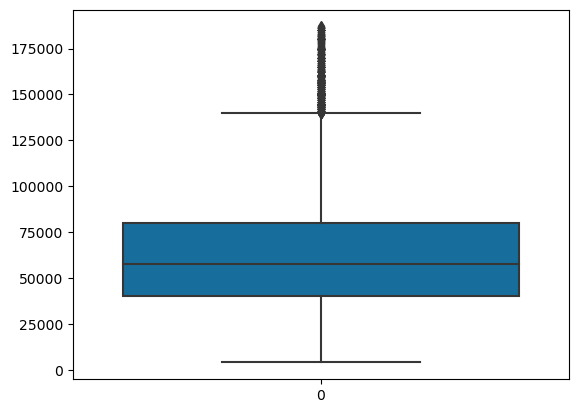

In [506]:
#Check for outliers
print(Df_loan['annual_inc'].describe())
sns.boxplot(Df_loan['annual_inc'])

In [507]:
#The above box plot is too bunched up which means we have some outliers 

#Checking the different quarantiles to pick the safe number to filter the data with
print(Df_loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1]))

0.50     57600.0
0.75     80000.0
0.90    110000.0
0.95    129000.0
0.97    141000.0
0.98    150000.0
0.99    165000.0
1.00    186996.0
Name: annual_inc, dtype: float64


count     37751.000000
mean      63903.956086
std       32263.103670
min        4000.000000
25%       40000.000000
50%       57600.000000
75%       80000.000000
max      186996.000000
Name: annual_inc, dtype: float64


<Axes: >

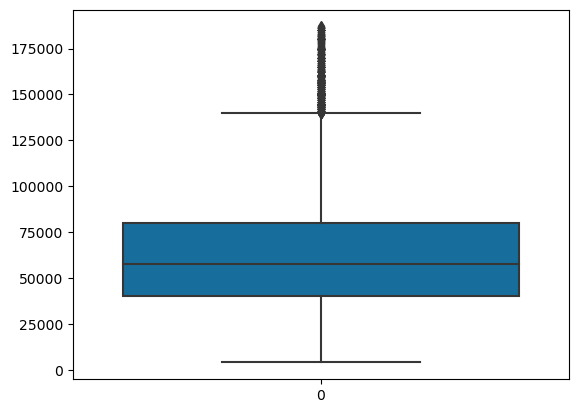

In [495]:
#Considering the 99 percentile value and filtering data using that value
#Remove the records which are greater than 99 percentile
Df_loan = Df_loan[Df_loan.annual_inc<Df_loan['annual_inc'].quantile(0.99)]
print(Df_loan.annual_inc.describe())
sns.boxplot(Df_loan['annual_inc'])

In [440]:
# Filter the DataFrame to create a new DataFrame containing only charged off loans
Df_loan_ChargedOff=Df_loan[Df_loan['loan_status']=='Charged Off']

In [491]:
#From all the loan data, find the % of Fully Paid, Charged Off & current loan
(Df_loan['loan_status'].value_counts() / len(Df_loan) * 100).round(2)

Fully Paid     85.4
Charged Off    14.6
Name: loan_status, dtype: float64

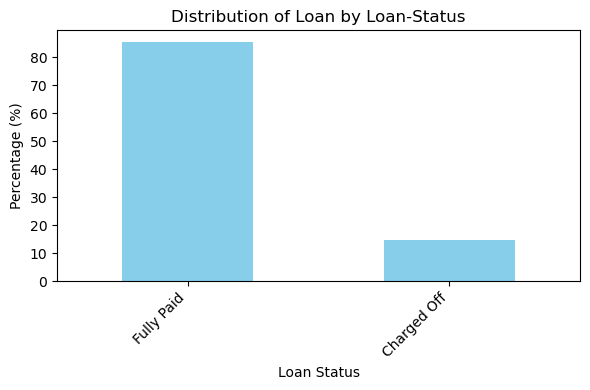

In [398]:
#14.17 loans are charged off
loan_status_percentage = (Df_loan['loan_status'].value_counts() / len(Df_loan) * 100).round(2)
plt.figure(figsize=(6, 4))
plt.title('Distribution of Loan by Loan-Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
ax = loan_status_percentage.plot(kind='bar', color='skyblue')
ax.set_xticklabels(loan_status_percentage.index, rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='term'>

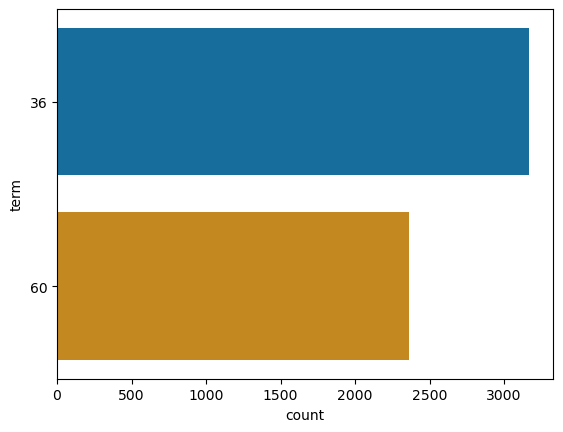

In [470]:
sns.countplot(y='term', data=Df_loan[Df_loan['loan_status']=='Charged Off'])

In [399]:
#All the loan records distribution based on verification_status
DF_Ver_Status= Df_loan_ChargedOff.groupby('verification_status').size().reset_index(name='verification_status_Count').sort_values(by='verification_status_Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
DF_Ver_Status.head()

,verification_status,verification_status_Count,perc_value
0,Not Verified,2123,38.128592
2,Verified,2026,36.386494
1,Source Verified,1419,25.484914


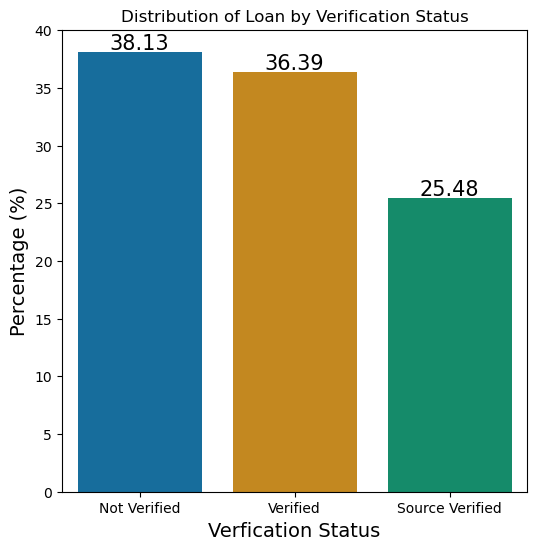

In [400]:
#Do not consider
# Defining the plot size
plt.figure(figsize=(6, 6))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="verification_status", y="perc_value", data=DF_Ver_Status)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Verfication Status", size=14)
 
# Setting the label for y-axis
plt.ylabel("Percentage (%)", size=14)
 
# Setting the title for the graph
plt.title("Distribution of Loan by Verification Status")
 
# Finally showing the plot
plt.show()

In [401]:
#Do not consider
#Charged off loan records distribution based on purpose
loan_counts_by_purpose = Df_loan_ChargedOff.groupby('purpose').size()
total_loans = loan_counts_by_purpose.sum()
percentage_distribution = (loan_counts_by_purpose / total_loans * 100).round(2)
percentage_distribution = percentage_distribution.sort_values(ascending=False)
percentage_distribution

purpose
debt_consolidation    49.34
other                 11.22
credit_card            9.63
small_business         8.48
home_improvement       6.02
major_purchase         3.93
car                    2.86
medical                1.89
wedding                1.69
moving                 1.63
house                  1.04
educational            0.99
vacation               0.95
renewable_energy       0.34
dtype: float64

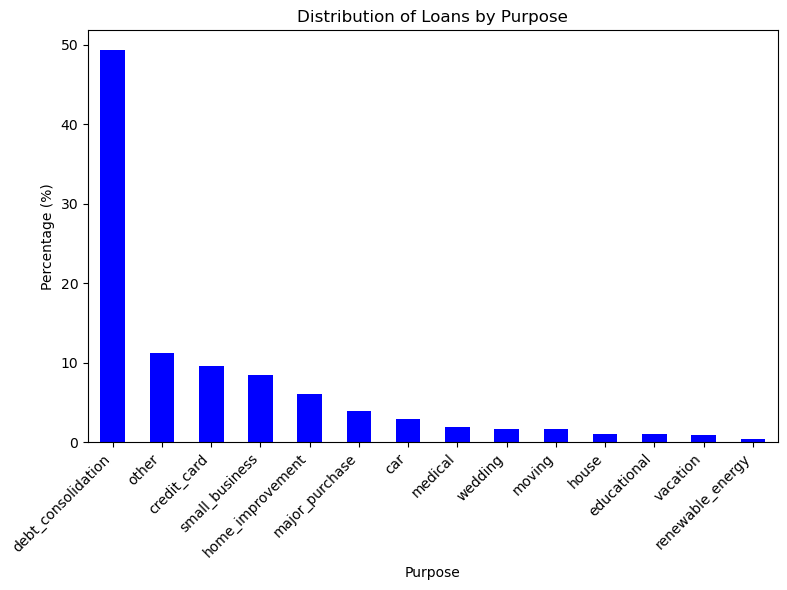

In [402]:

purpose_counts = Df_loan_ChargedOff['purpose'].value_counts()
percentage_distribution = (purpose_counts / len(Df_loan_ChargedOff) * 100).round(2)
plt.figure(figsize=(8, 6))
percentage_distribution.plot(kind='bar', color='blue')
plt.xlabel('Purpose')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Loans by Purpose')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [403]:
#Charged off loan records distribution based on home_ownership
DF_HomeOwnership= Df_loan_ChargedOff.groupby('home_ownership').size().reset_index(name='home_ownership_Count').sort_values(by='home_ownership_Count', ascending=False)
DF_HomeOwnership['perc_value'] = 100 * DF_HomeOwnership.home_ownership_Count / DF_HomeOwnership.home_ownership_Count.sum()
DF_HomeOwnership.head()

,home_ownership,home_ownership_Count,perc_value
3,RENT,2814,50.538793
0,MORTGAGE,2298,41.271552
2,OWN,438,7.866379
1,OTHER,18,0.323276


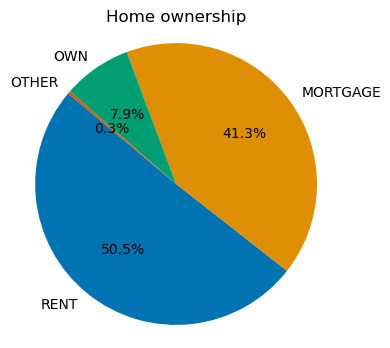

In [404]:
home_ownership_counts = Df_loan_ChargedOff[Df_loan_ChargedOff['loan_status'] == 'Charged Off']['home_ownership'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Home ownership')
plt.axis('equal')
plt.show()

C:\Users\deepak.sivaraman\AppData\Local\Temp\ipykernel_56204\4168678383.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Df_pivot_table = Df_grouped_home_purpose.pivot("home_ownership", "purpose", "count")


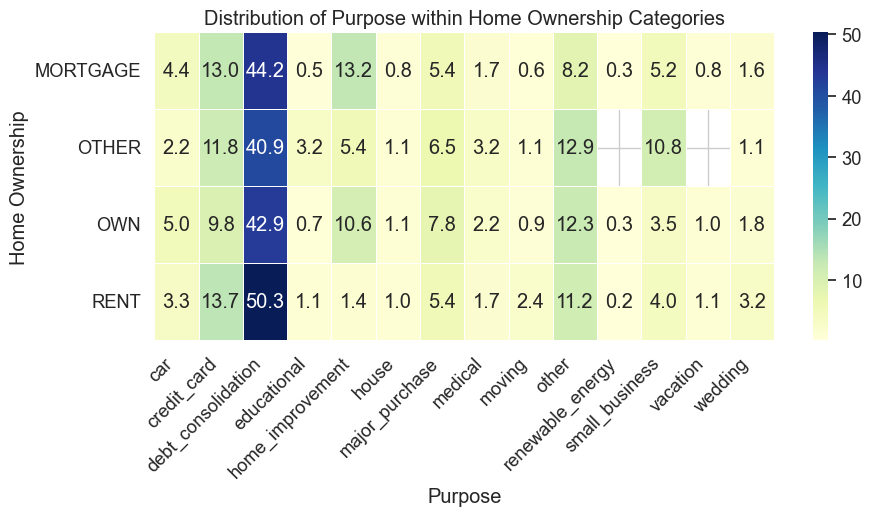

In [690]:
#Use the last Graph
Df_loan_Analysis = Df_loan[Df_loan['loan_status'] != 'Current']
Df_grouped_home_purpose = Df_loan_Analysis.groupby(['home_ownership', 'purpose']).size().reset_index(name='count')
Df_pivot_table = Df_grouped_home_purpose.pivot("home_ownership", "purpose", "count")
Df_pivot_table_percentages = Df_pivot_table.div(Df_pivot_table.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10, 4))
sns.heatmap(Df_pivot_table_percentages, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Distribution of Purpose within Home Ownership Categories")
plt.xlabel("Purpose")
plt.ylabel("Home Ownership")
plt.xticks(rotation=45, ha="right")
plt.show()

<Axes: xlabel='grade', ylabel='count'>

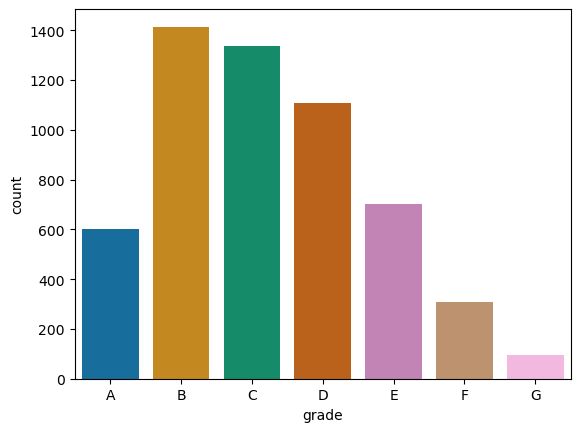

In [406]:
#Do not consider since this changes when looked at Charged off vs Fully paid scenario
sns.countplot(x = 'grade', data = Df_loan_ChargedOff, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

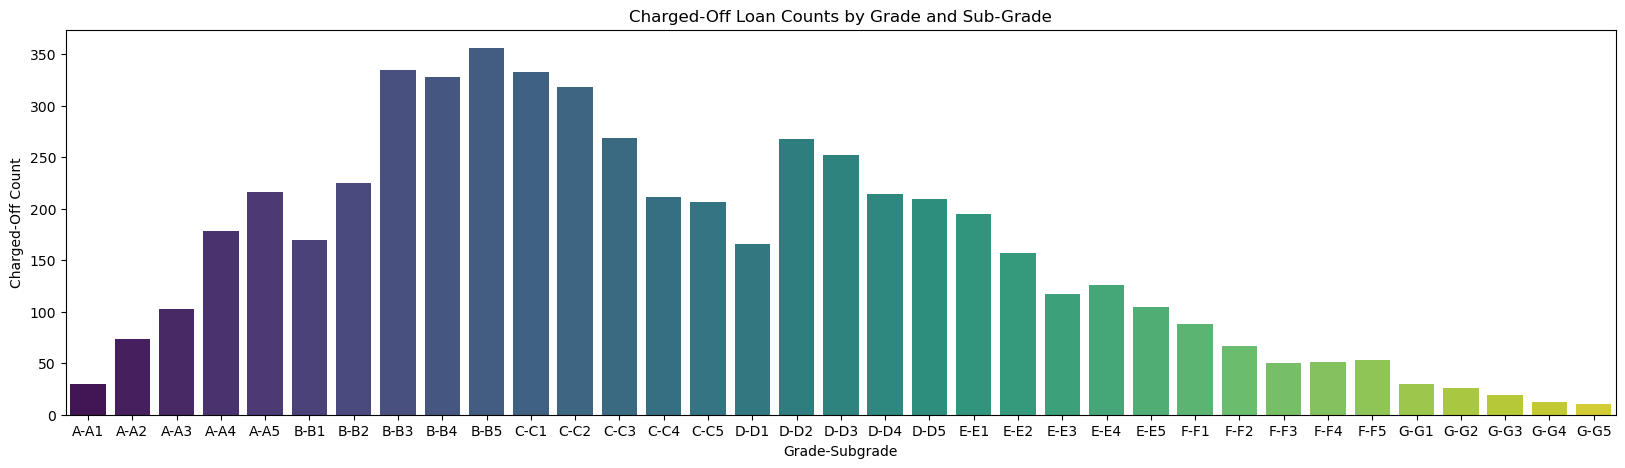

In [407]:
#This we need to plot considering FullyPaid and Charged Off
Df_charged_off_counts = Df_loan_ChargedOff.groupby(['grade', 'sub_grade']).size().reset_index(name='count')
Df_charged_off_counts['composite_label'] = Df_charged_off_counts['grade'] + '-' + Df_charged_off_counts['sub_grade']

# Plot the data as a box plot
plt.figure(figsize=(20, 5))
sns.barplot(data=Df_charged_off_counts, x='composite_label', y='count', palette='viridis')
plt.title('Charged-Off Loan Counts by Grade and Sub-Grade')
plt.xlabel('Grade-Subgrade')
plt.ylabel('Charged-Off Count')
plt.show()

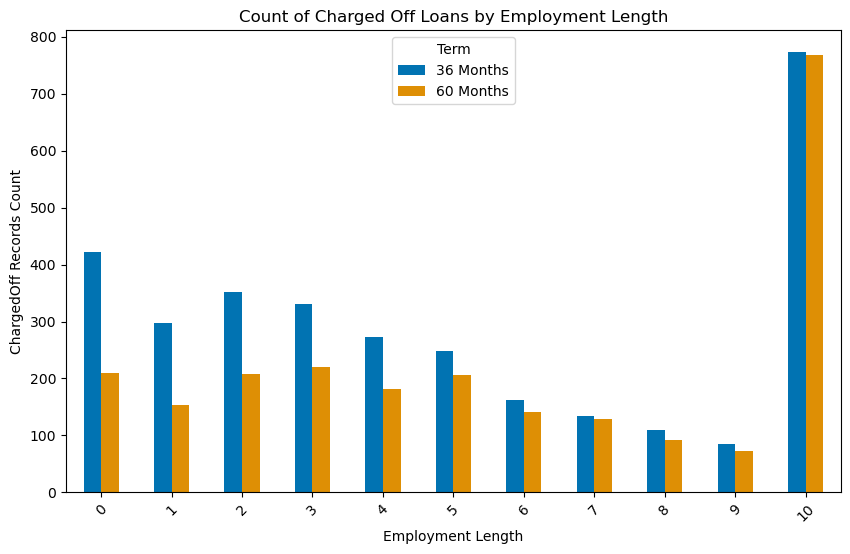

In [408]:
# Create a DataFrame to count employment length occurrences for both terms
Df_ChargedOff_in_36_months = Df_loan_ChargedOff[Df_loan_ChargedOff['term'] == 36]
Df_ChargedOff_in_60_months = Df_loan_ChargedOff[Df_loan_ChargedOff['term'] == 60]
Df_empLength_in_bothTerm = pd.DataFrame({
    '36 Months': Df_ChargedOff_in_36_months['emp_length'].value_counts(),
    '60 Months': Df_ChargedOff_in_60_months['emp_length'].value_counts()
}).sort_index()

# Create a grouped bar chart
Df_empLength_in_bothTerm.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Charged Off Loans by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('ChargedOff Records Count')
plt.xticks(rotation=45)
plt.legend(title='Term', loc='upper center', title_fontsize='10')
plt.show()

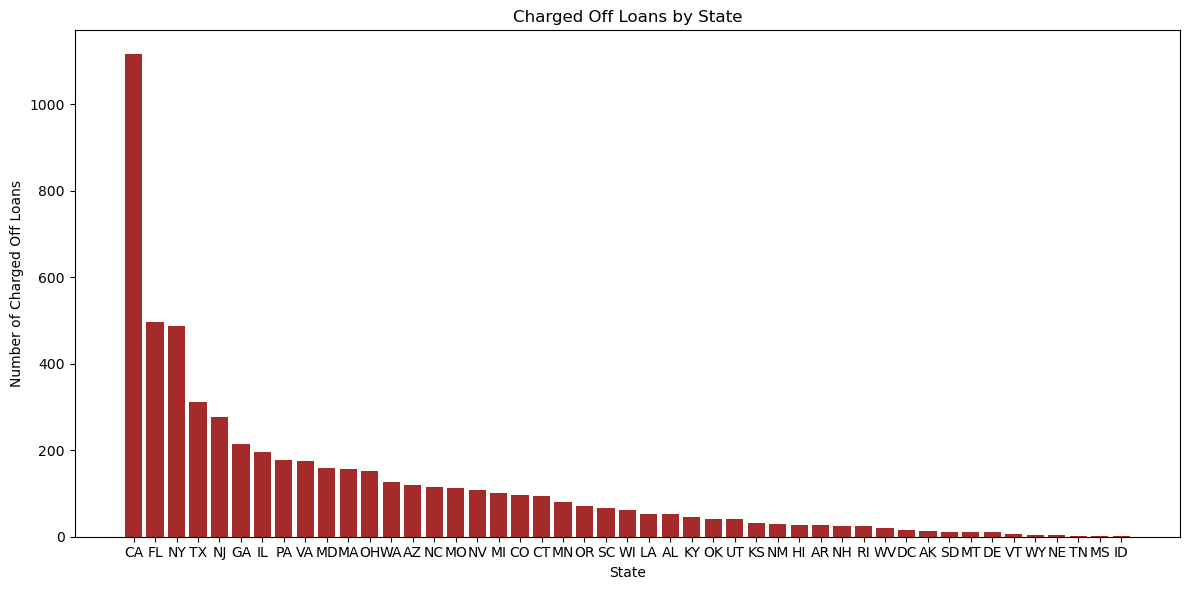

In [409]:

# Group data by state and zip code
Df_grouped_addr_state = Df_loan_ChargedOff.groupby(['addr_state']).size().reset_index(name='Records_count')
Df_grouped_addr_state = Df_grouped_addr_state.sort_values(by='Records_count', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(Df_grouped_addr_state['addr_state'], Df_grouped_addr_state['Records_count'], color='brown')
plt.title('Charged Off Loans by State')
plt.xlabel('State')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [410]:
Df_groupByStateZipCode = Df_loan_ChargedOff.groupby(['addr_state', 'zip_code']).size().reset_index(name='Records_count')
Df_groupByStateZipCode=Df_groupByStateZipCode.sort_values(by='Records_count', ascending=False).head(50)

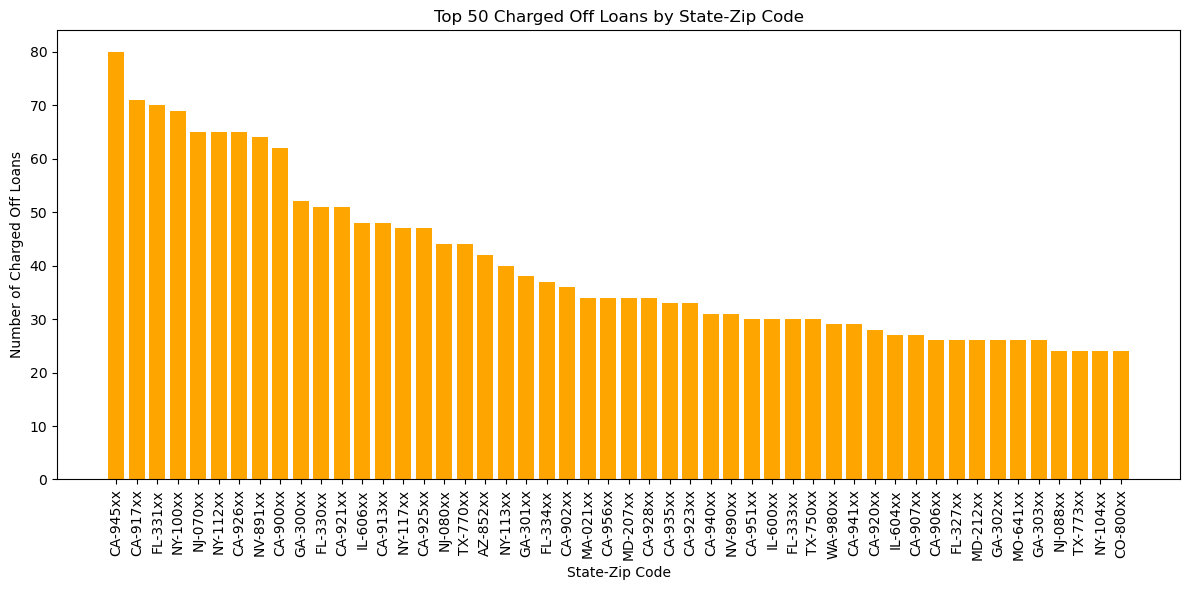

In [411]:
plt.figure(figsize=(12, 6))

# Combine 'addr_state' and 'zip_code' for the x-axis
x_labels = [f"{state}-{zipcode}" for state, zipcode in zip(Df_groupByStateZipCode['addr_state'], Df_groupByStateZipCode['zip_code'])]

# Create a bar chart to visualize 'Records_count' by state-zipcode combinations
plt.bar(x_labels, Df_groupByStateZipCode['Records_count'], color='orange')

plt.title('Top 50 Charged Off Loans by State-Zip Code')
plt.xlabel('State-Zip Code')
plt.ylabel('Number of Charged Off Loans')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [314]:
Df_loan.issue_d.describe()
Df_loan.issue_d.head()

0    11-Dec
1    11-Dec
2    11-Dec
3    11-Dec
5    11-Dec
Name: issue_d, dtype: object

In [658]:
Df_loan["issued_date_formatted"] = Df_loan.issue_d.apply(lambda x : str(x) if len(str(x))==6 else '0'+ str(x))
Df_loan["issued_date"]=pd.to_datetime(Df_loan.issued_date_formatted.str.upper(), format='%y-%b', yearfirst=True)#pd.to_datetime(Df_loan.issue_d)
Df_loan["issued_year"]=pd.to_datetime(Df_loan.issued_date).dt.year
Df_loan["issued_month"]=pd.to_datetime(Df_loan.issued_date).dt.month
Df_loan.head()
df_test = Df_loan[Df_loan.issued_year==2007]
df_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_amt_groups,interest_rate_groups1,annual_inc_groups1,rv_util_groups,loan_status_index,installment_groups,issued_date_formatted,issued_date,issued_year,issued_month
39464,20000,20000,225.00,36,11.22,656.86,C,C4,10,RENT,...,"(16000.0, 35000.0]","(10.95, 12.73]","(37000.0, 50000.0]","(40.0, 58.0]",0,"(472.32, 1305.19]",07-Dec,2007-12-01,2007,12
39466,7500,7500,1167.14,36,10.59,244.09,C,C2,0,RENT,...,"(5000.0, 7500.0]","(7.9, 10.95]","(37000.0, 50000.0]","(20.0, 40.0]",0,"(226.06, 325.66]",07-Dec,2007-12-01,2007,12
39468,2000,2000,1861.08,36,7.75,62.45,A,A3,10,RENT,...,"(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(40.0, 58.0]",1,"(15.689, 148.51]",07-Dec,2007-12-01,2007,12
39469,2800,2800,1100.00,36,7.43,87.01,A,A2,1,RENT,...,"(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(-1.0, 20.0]",0,"(15.689, 148.51]",07-Dec,2007-12-01,2007,12
39470,8000,8000,2475.00,36,8.07,250.95,A,A4,3,RENT,...,"(7500.0, 11000.0]","(7.9, 10.95]","(50000.0, 65000.0]","(-1.0, 20.0]",0,"(226.06, 325.66]",07-Dec,2007-12-01,2007,12


<Axes: xlabel='issued_month', ylabel='count'>

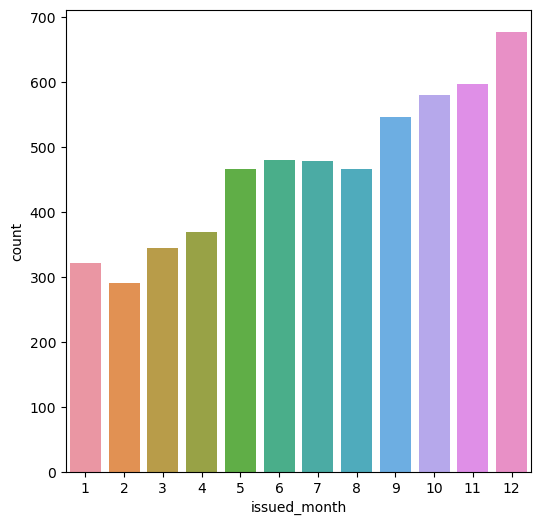

In [341]:
plt.figure(figsize=(6,6))
sns.countplot(x='issued_month', data=Df_loan[Df_loan['loan_status']=='Charged Off'])

<Axes: xlabel='issued_year', ylabel='count'>

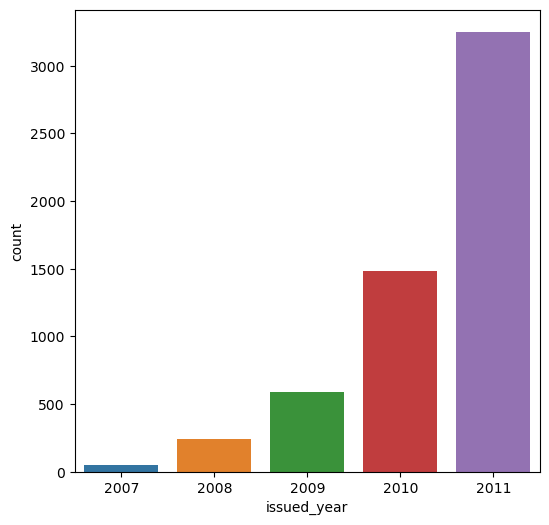

In [340]:
#Do not consider
plt.figure(figsize=(6,6))
sns.countplot(x='issued_year', data=Df_loan[Df_loan['loan_status']=='Charged Off'])

<Axes: xlabel='issued_year', ylabel='count'>

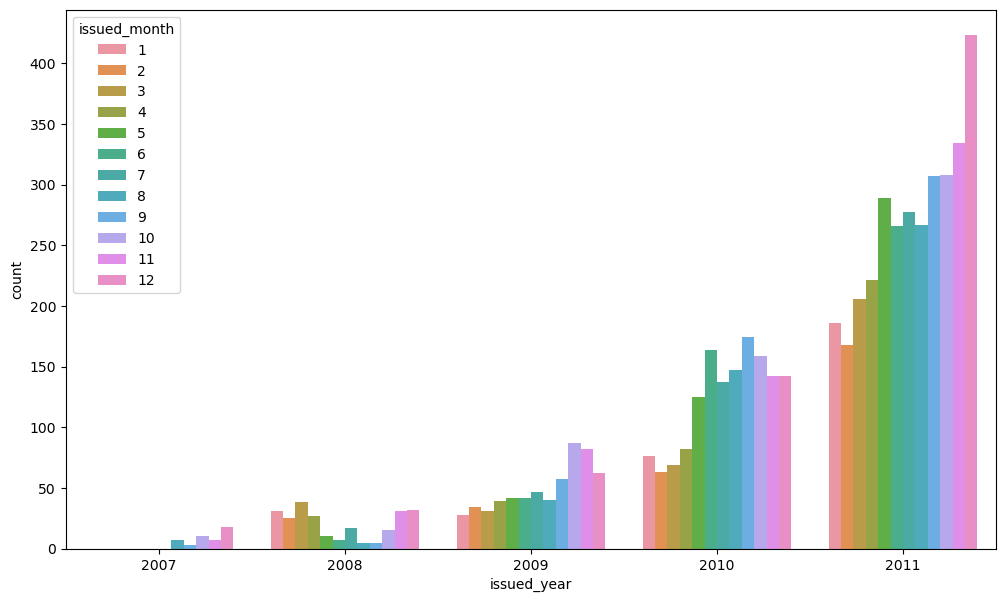

In [347]:
#Do not consider
ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'issued_year', hue = 'issued_month',data = Df_loan[Df_loan.loan_status == 'Charged Off'])

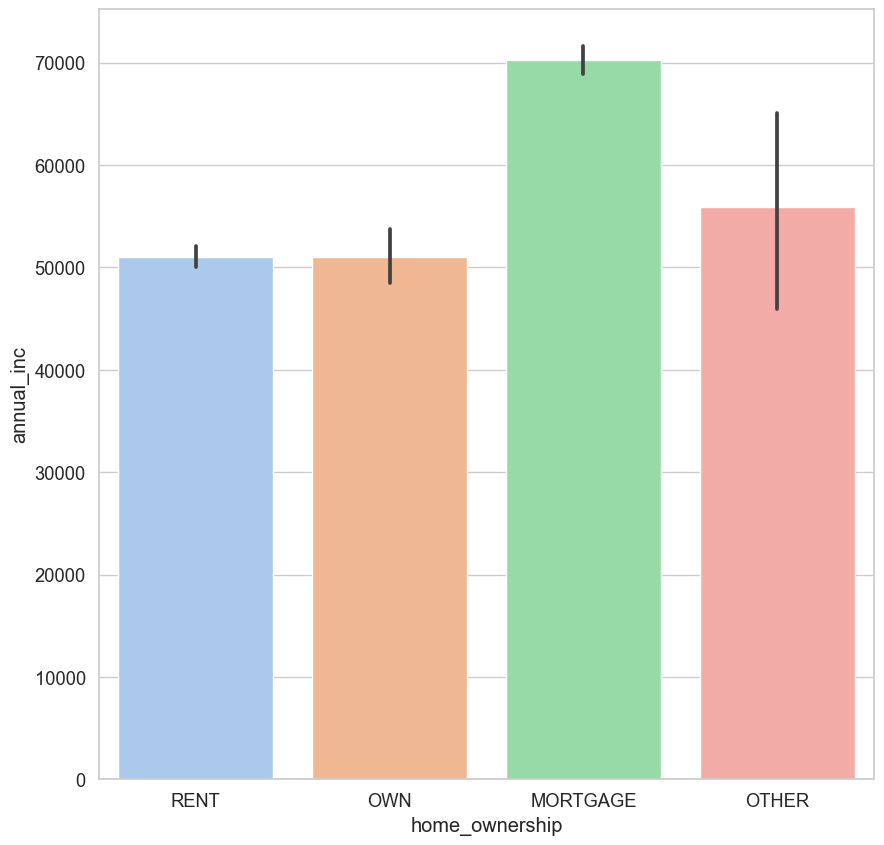

In [687]:
#Do not Consider
plt.figure(figsize=(10,10))
#sns.barplot(data =Df_loan_ChargedOff,x='home_ownership', y='annual_inc',palette="pastel")
sns.barplot(data =Df_loan[Df_loan.loan_status == 'Charged Off'],x='home_ownership', y='annual_inc',palette="pastel")
plt.show()

In [471]:
Df_loan.loan_amnt.describe()

count    37751.000000
mean     10895.475617
std       7210.920487
min        500.000000
25%       5150.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [563]:
Df_loan['loan_amt_groups'] = pd.qcut(Df_loan['loan_amnt'], q=5)
Df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,annual_inc_temp,annual_inc_groups,interest_rate_groups,loan_amt_groups,interest_rate_groups1,annual_inc_groups1,rv_util_groups
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,171.62,24000.0,"(3999.999, 37000.0]","(7.9, 10.95]","(499.999, 5000.0]","(7.9, 10.95]","(3999.999, 37000.0]","(77.0, 100.0]"
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,117.08,1.11,119.66,30000.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(-1.0, 20.0]"
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,649.91,12252.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(77.0, 100.0]"
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,0.00,0.00,357.48,49200.0,"(37000.0, 50000.0]","(12.73, 15.21]","(7500.0, 11000.0]","(12.73, 15.21]","(37000.0, 50000.0]","(20.0, 40.0]"
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,161.03,36000.0,"(3999.999, 37000.0]","(5.419, 7.9]","(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(20.0, 40.0]"


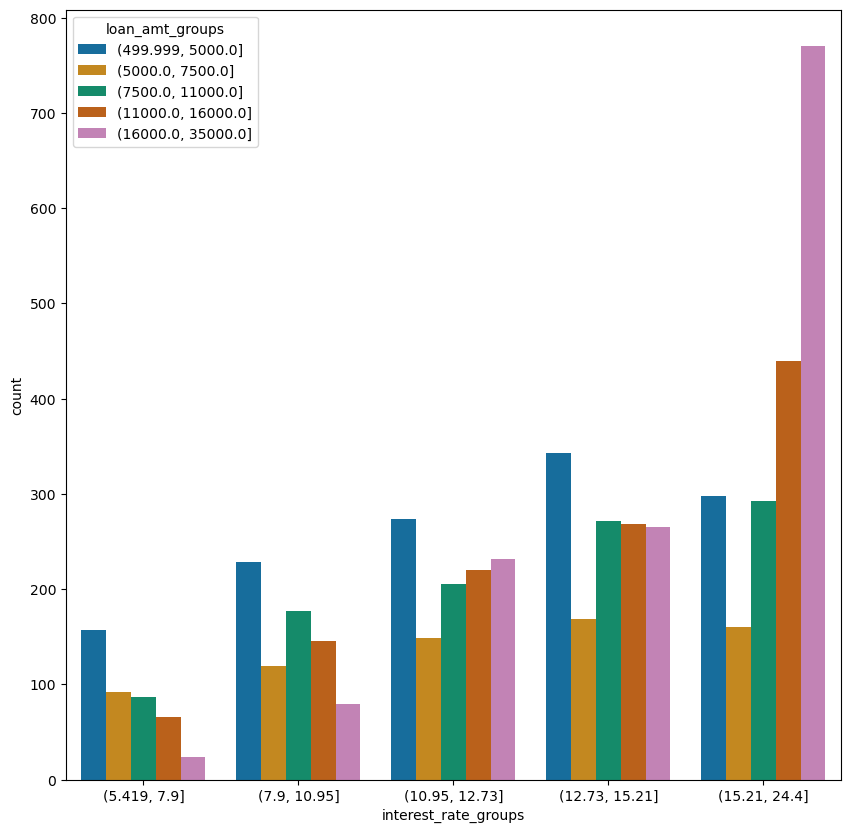

In [564]:
#POINT 6

plt.figure(figsize=(10,10))
sns.countplot(x = 'interest_rate_groups', hue = 'loan_amt_groups',data = Df_loan[Df_loan.loan_status == 'Charged Off'])
plt.show()

In [556]:
Df_loan['interest_rate_groups'] = pd.qcut(Df_loan['int_rate'], q=5)
Df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,annual_inc_temp,annual_inc_groups,interest_rate_groups,loan_amt_groups,interest_rate_groups1,annual_inc_groups1,rv_util_groups
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,171.62,24000.0,"(3999.999, 37000.0]","(7.9, 10.95]","(499.999, 5000.0]","(7.9, 10.95]","(3999.999, 37000.0]","(77.0, 100.0]"
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,117.08,1.11,119.66,30000.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(-1.0, 20.0]"
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,649.91,12252.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(77.0, 100.0]"
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,0.00,0.00,357.48,49200.0,"(37000.0, 50000.0]","(12.73, 15.21]","(7500.0, 11000.0]","(12.73, 15.21]","(37000.0, 50000.0]","(20.0, 40.0]"
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,161.03,36000.0,"(3999.999, 37000.0]","(5.419, 7.9]","(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(20.0, 40.0]"


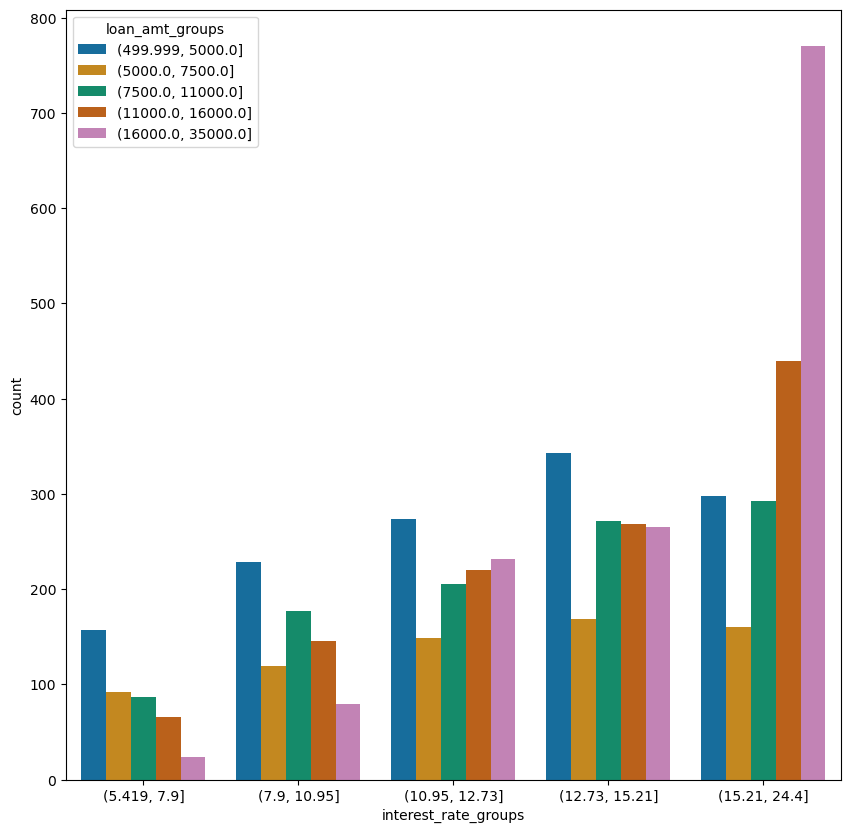

In [566]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'interest_rate_groups', hue = 'loan_amt_groups',data = Df_loan[Df_loan.loan_status == 'Charged Off'])
plt.show()

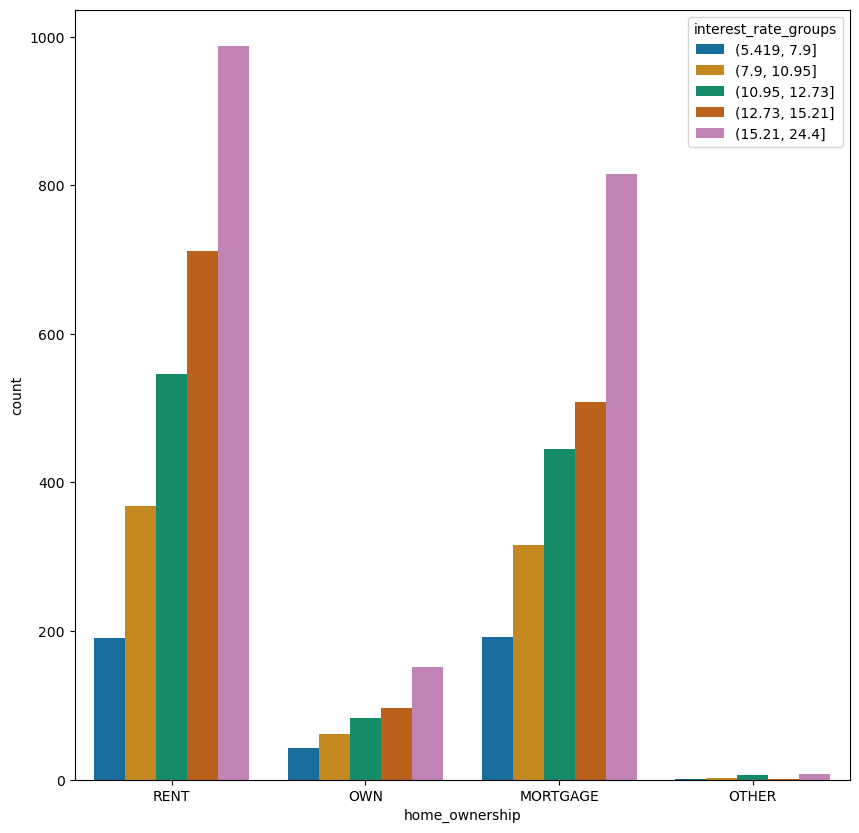

In [559]:
#Do not consider
plt.figure(figsize=(10,10))
sns.countplot(x = 'home_ownership', hue = 'interest_rate_groups',data = Df_loan[Df_loan.loan_status == 'Charged Off'])
plt.show()

In [555]:
#Create Income Bins. Considered the difference between Max and Min value and divided by 5 to create 5 bins
Df_loan['annual_inc_groups'] = pd.qcut(Df_loan['annual_inc'], q=5)
#Df_loan['annual_inc_groups'] = pd.qcut(Df_loan['annual_inc_temp'], q=7)
Df_loan.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,annual_inc_temp,annual_inc_groups,interest_rate_groups,loan_amt_groups,interest_rate_groups1,annual_inc_groups1,rv_util_groups
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10,RENT,...,0.00,0.0000,171.62,24000.0,"(3999.999, 37000.0]",9%-13%,"(499.999, 5000.0]","(7.9, 10.95]","(3999.999, 37000.0]","(77.0, 100.0]"
1,2500,2500,2500.00,60,15.27,59.83,C,C4,0,RENT,...,117.08,1.1100,119.66,30000.0,"(3999.999, 37000.0]",13%-17%,"(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(-1.0, 20.0]"
2,2400,2400,2400.00,36,15.96,84.33,C,C5,10,RENT,...,0.00,0.0000,649.91,12252.0,"(3999.999, 37000.0]",13%-17%,"(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(77.0, 100.0]"
3,10000,10000,10000.00,36,13.49,339.31,C,C1,10,RENT,...,0.00,0.0000,357.48,49200.0,"(37000.0, 50000.0]",13%-17%,"(7500.0, 11000.0]","(12.73, 15.21]","(37000.0, 50000.0]","(20.0, 40.0]"
5,5000,5000,5000.00,36,7.90,156.46,A,A4,3,RENT,...,0.00,0.0000,161.03,36000.0,"(3999.999, 37000.0]",5%-9%,"(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(20.0, 40.0]"
6,7000,7000,7000.00,60,15.96,170.08,C,C5,8,RENT,...,0.00,0.0000,1313.76,47004.0,"(37000.0, 50000.0]",13%-17%,"(5000.0, 7500.0]","(15.21, 24.4]","(37000.0, 50000.0]","(77.0, 100.0]"
7,3000,3000,3000.00,36,18.64,109.43,E,E1,9,RENT,...,0.00,0.0000,111.34,48000.0,"(37000.0, 50000.0]",17%-21%,"(499.999, 5000.0]","(15.21, 24.4]","(37000.0, 50000.0]","(77.0, 100.0]"
8,5600,5600,5600.00,60,21.28,152.39,F,F2,4,OWN,...,189.06,2.0900,152.39,40000.0,"(37000.0, 50000.0]",21%-25%,"(5000.0, 7500.0]","(15.21, 24.4]","(37000.0, 50000.0]","(20.0, 40.0]"
9,5375,5375,5350.00,60,12.69,121.45,B,B5,0,RENT,...,269.29,2.5200,121.45,15000.0,"(3999.999, 37000.0]",9%-13%,"(5000.0, 7500.0]","(10.95, 12.73]","(3999.999, 37000.0]","(20.0, 40.0]"
10,6500,6500,6500.00,60,14.65,153.45,C,C3,5,OWN,...,0.00,0.0000,1655.54,72000.0,"(65000.0, 87048.0]",13%-17%,"(5000.0, 7500.0]","(12.73, 15.21]","(65000.0, 87048.0]","(20.0, 40.0]"


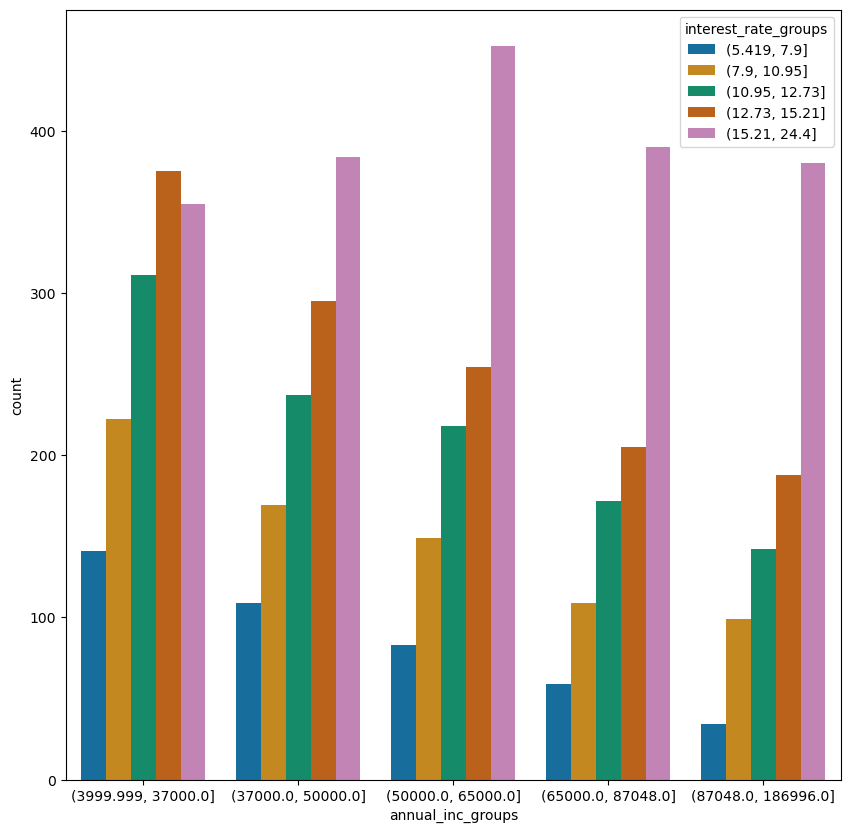

In [560]:
#Do not consider
plt.figure(figsize=(10,10))
sns.countplot(x = 'annual_inc_groups', hue = 'interest_rate_groups',data = Df_loan[Df_loan.loan_status == 'Charged Off'])
plt.show()

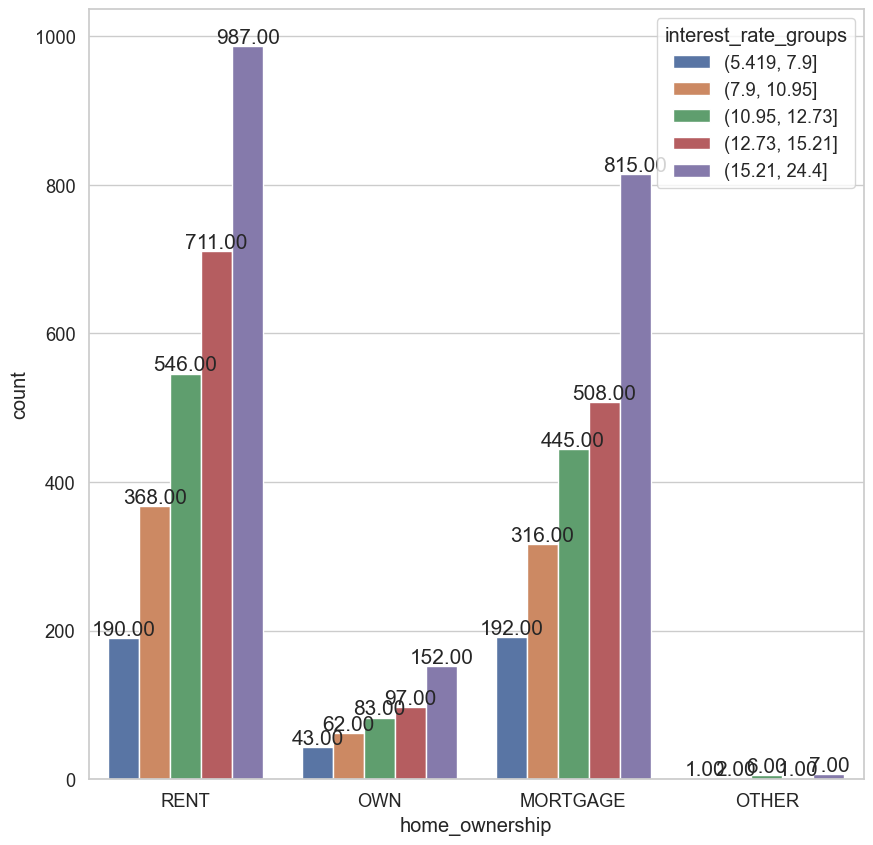

In [667]:
#POINT 5
plt.figure(figsize=(10,10))
plots =sns.countplot(x = 'home_ownership', hue = 'interest_rate_groups',data = Df_loan[Df_loan.loan_status == 'Charged Off'])

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

      loan_amt_groups  Charged Count  Paid Count  defaut_pct
4    (5000.0, 7500.0]            689        5116   11.869078
3   (7500.0, 11000.0]           1034        6628   13.495171
1   (499.999, 5000.0]           1300        8074   13.868146
2  (11000.0, 16000.0]           1139        6614   14.691087
0  (16000.0, 35000.0]           1370        5787   19.142099


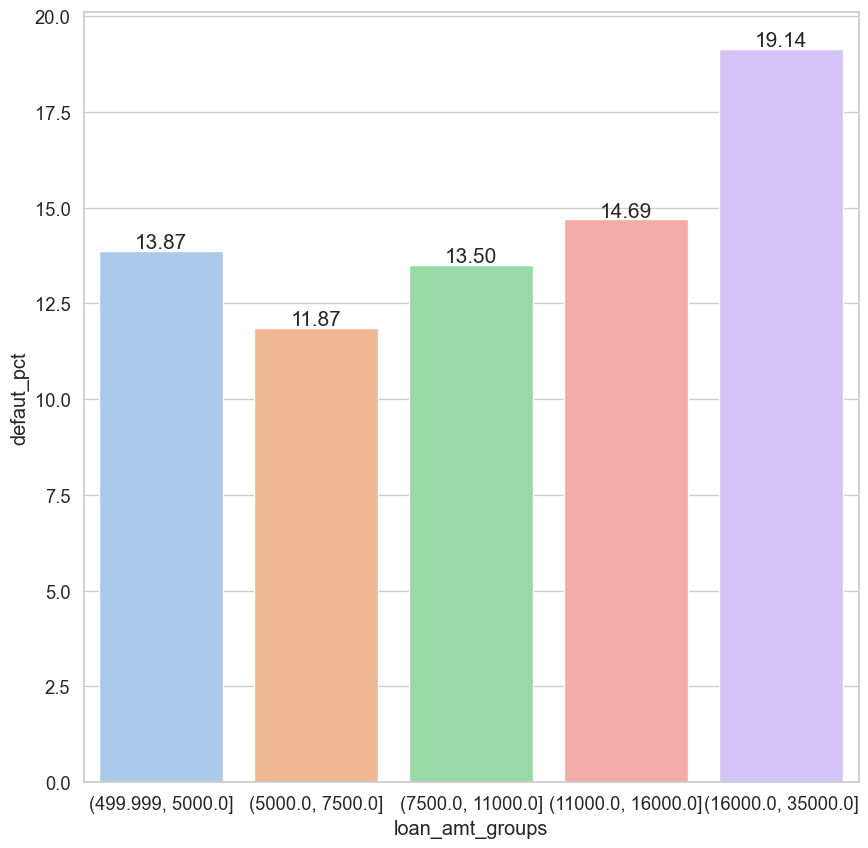

In [668]:
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('loan_amt_groups').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('loan_amt_groups').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='loan_amt_groups')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100
merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))

plots = sns.barplot(data =merged_df,x='loan_amt_groups', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

  interest_rate_groups  Charged Count  Paid Count  defaut_pct
4         (5.419, 7.9]            426        7478    5.389676
3         (7.9, 10.95]            748        6500   10.320088
2       (10.95, 12.73]           1080        6490   14.266843
1       (12.73, 15.21]           1317        6286   17.322110
0        (15.21, 24.4]           1961        5465   26.407218


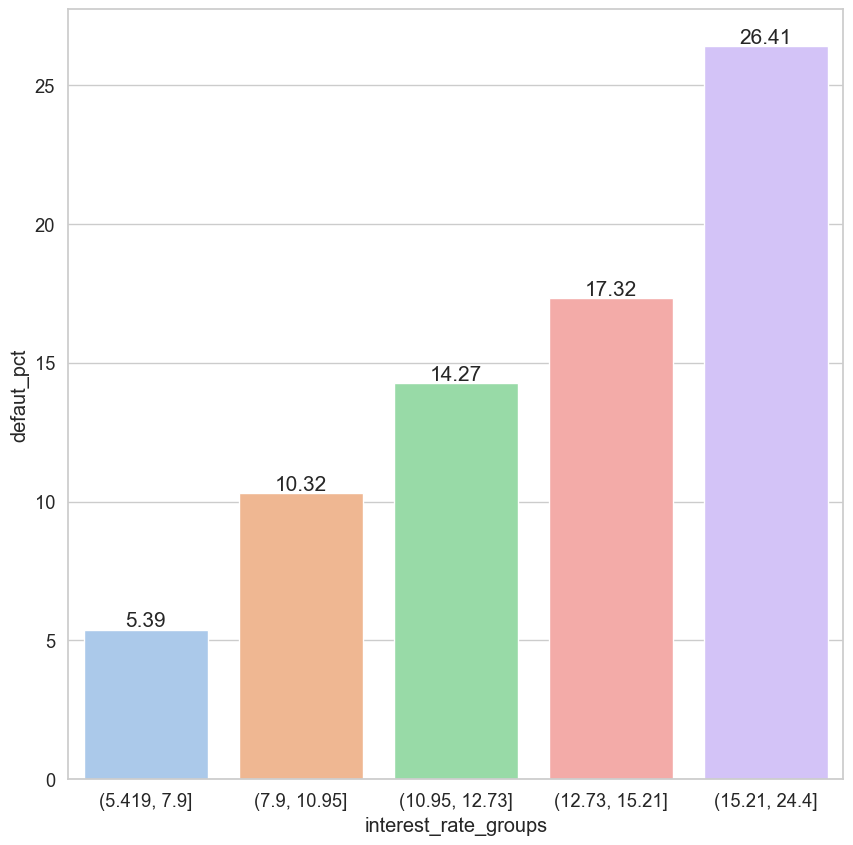

In [669]:
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('interest_rate_groups').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('interest_rate_groups').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='interest_rate_groups')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100
merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))

plots = sns.barplot(data =merged_df,x='interest_rate_groups', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

<Axes: xlabel='count', ylabel='interest_rate_groups'>

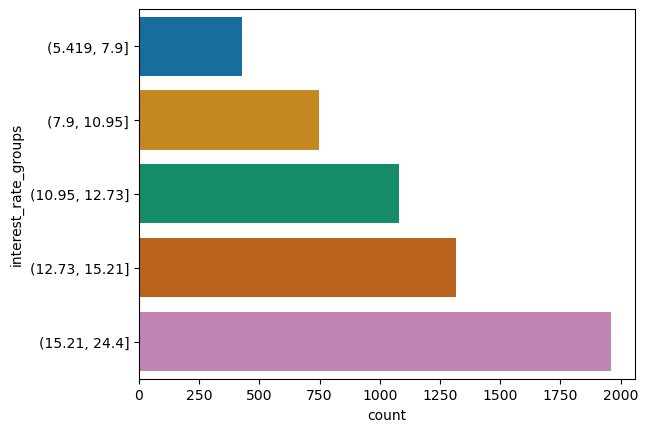

In [558]:
sns.countplot(y='interest_rate_groups', data=Df_loan[Df_loan['loan_status']=='Charged Off'])

     annual_inc_groups  Charged Count  Paid Count  defaut_pct
4  (87048.0, 186996.0]            843        6707   11.165563
3   (65000.0, 87048.0]            935        6222   13.064133
2   (50000.0, 65000.0]           1156        6542   15.016888
1   (37000.0, 50000.0]           1194        6484   15.550925
0  (3999.999, 37000.0]           1404        6264   18.309859


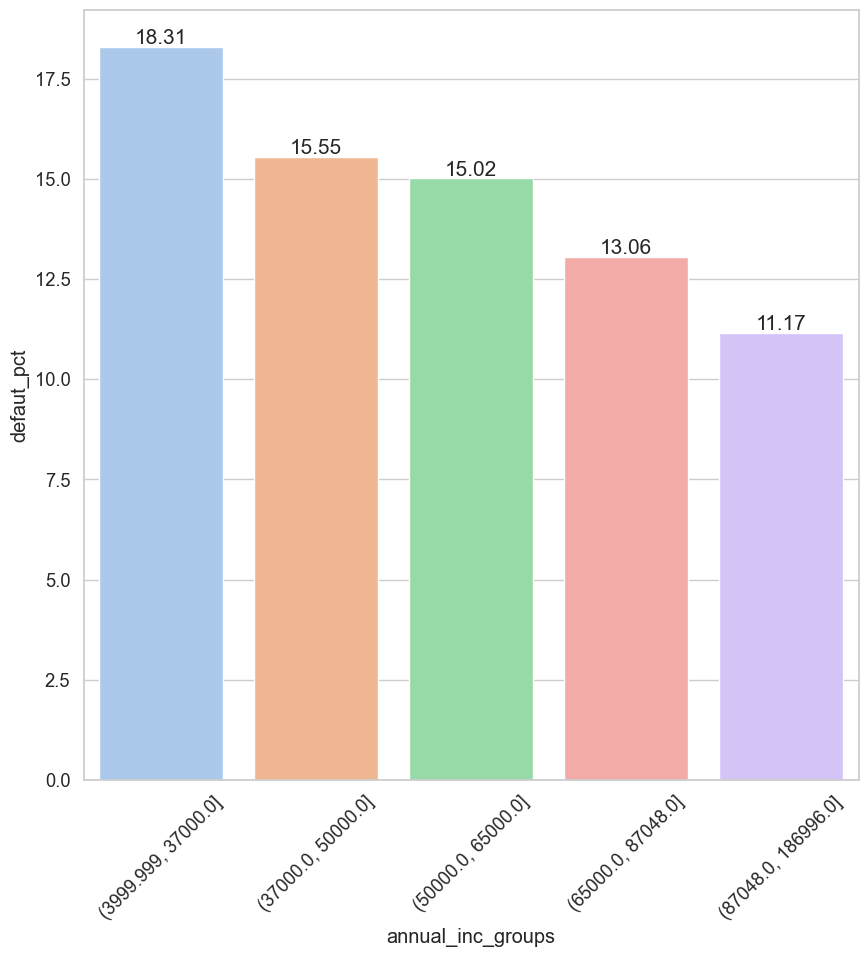

In [674]:
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('annual_inc_groups').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('annual_inc_groups').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='annual_inc_groups')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100
merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))

plots = sns.barplot(data =merged_df,x='annual_inc_groups', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

In [568]:
#Create Income Bins. Considered the difference between Max and Min value and divided by 5 to create 5 bins
Df_loan['rv_util_groups'] = pd.qcut(Df_loan['revol_util'], q=5,precision =0)
Df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,annual_inc_temp,annual_inc_groups,interest_rate_groups,loan_amt_groups,interest_rate_groups1,annual_inc_groups1,rv_util_groups
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,171.62,24000.0,"(3999.999, 37000.0]","(7.9, 10.95]","(499.999, 5000.0]","(7.9, 10.95]","(3999.999, 37000.0]","(77.0, 100.0]"
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,117.08,1.11,119.66,30000.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(-1.0, 20.0]"
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,649.91,12252.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(77.0, 100.0]"
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,0.00,0.00,357.48,49200.0,"(37000.0, 50000.0]","(12.73, 15.21]","(7500.0, 11000.0]","(12.73, 15.21]","(37000.0, 50000.0]","(20.0, 40.0]"
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,161.03,36000.0,"(3999.999, 37000.0]","(5.419, 7.9]","(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(20.0, 40.0]"


  rv_util_groups  Charged Count  Paid Count  defaut_pct
4   (-1.0, 20.0]            760        6822   10.023740
3   (20.0, 40.0]            905        6630   12.010617
2   (40.0, 58.0]           1094        6458   14.486229
1   (58.0, 77.0]           1274        6292   16.838488
0  (77.0, 100.0]           1499        6017   19.944119


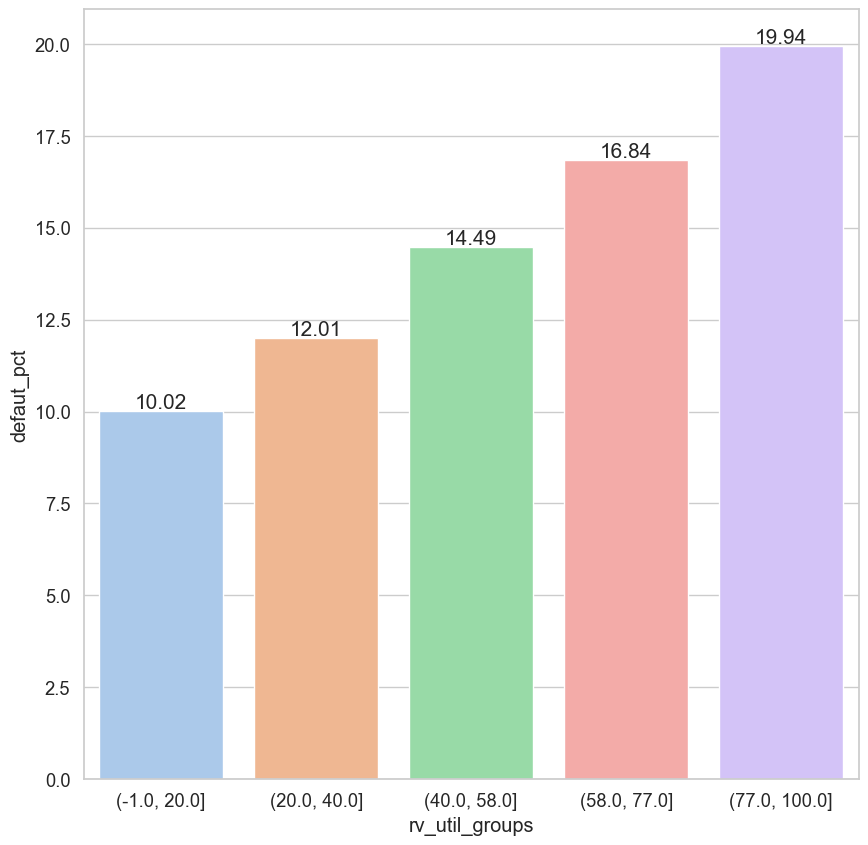

In [662]:
#POINT 12
    
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('rv_util_groups').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('rv_util_groups').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='rv_util_groups')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100
merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))
plots = sns.barplot(data =merged_df,x='rv_util_groups', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

  grade  Charged Count  Paid Count  defaut_pct
4     A            599        9302    6.049894
0     B           1404       10045   12.263080
1     C           1334        6327   17.412870
2     D           1102        3859   22.213263
3     E            693        1875   26.985981
5     F            305         624   32.831001
6     G             95         187   33.687943


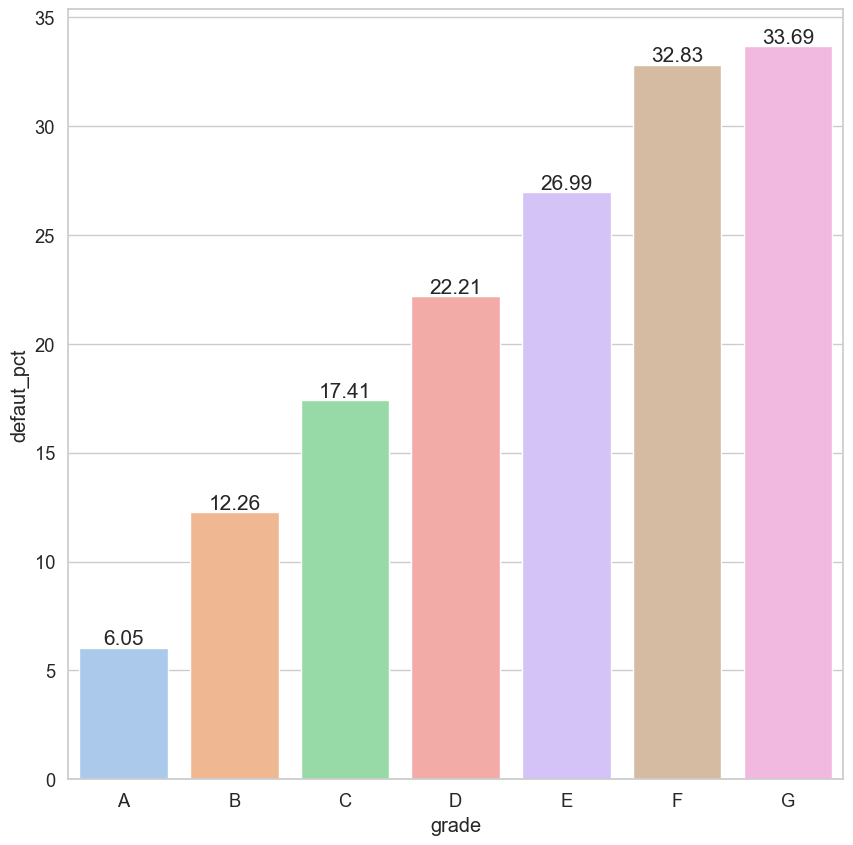

In [675]:
#POINT 4

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('grade').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('grade').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='grade')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))
plots = sns.barplot(data =merged_df,x='grade', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.show()

  home_ownership  Charged Count  Paid Count  defaut_pct
1       MORTGAGE           2276       14174   13.835866
2            OWN            437        2482   14.970880
0           RENT           2802       15487   15.320685
3          OTHER             17          76   18.279570


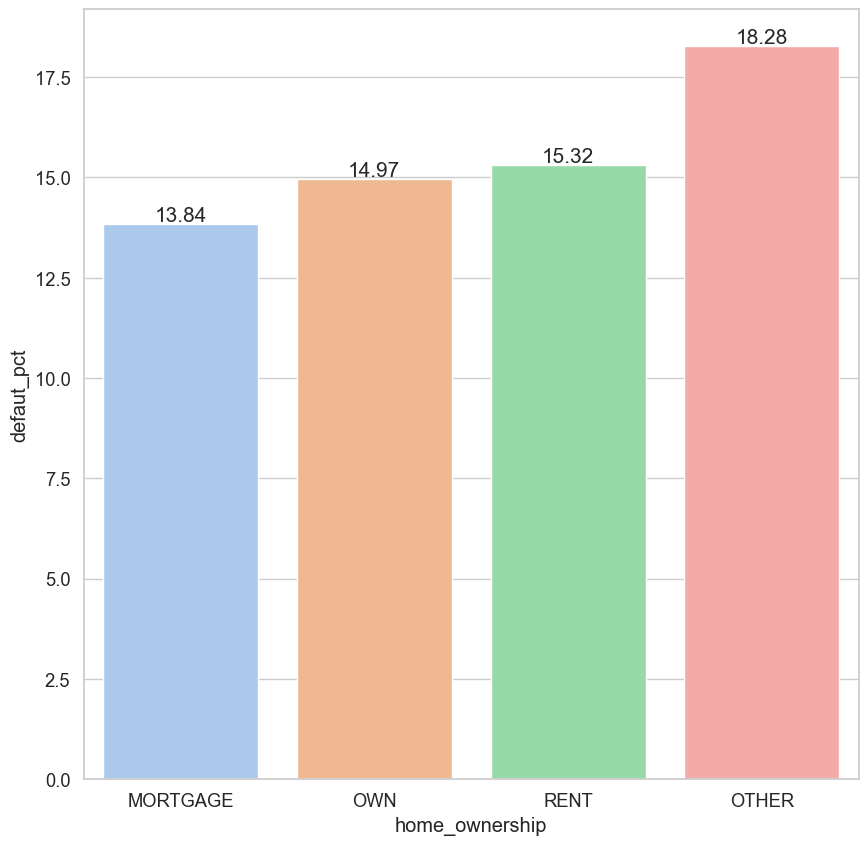

In [671]:
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('home_ownership').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('home_ownership').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='home_ownership')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))
plots = sns.barplot(data =merged_df,x='home_ownership', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()


  verification_status  Charged Count  Paid Count  defaut_pct
0        Not Verified           2114       14383   12.814451
2     Source Verified           1410        8022   14.949109
1            Verified           2008        9814   16.985282


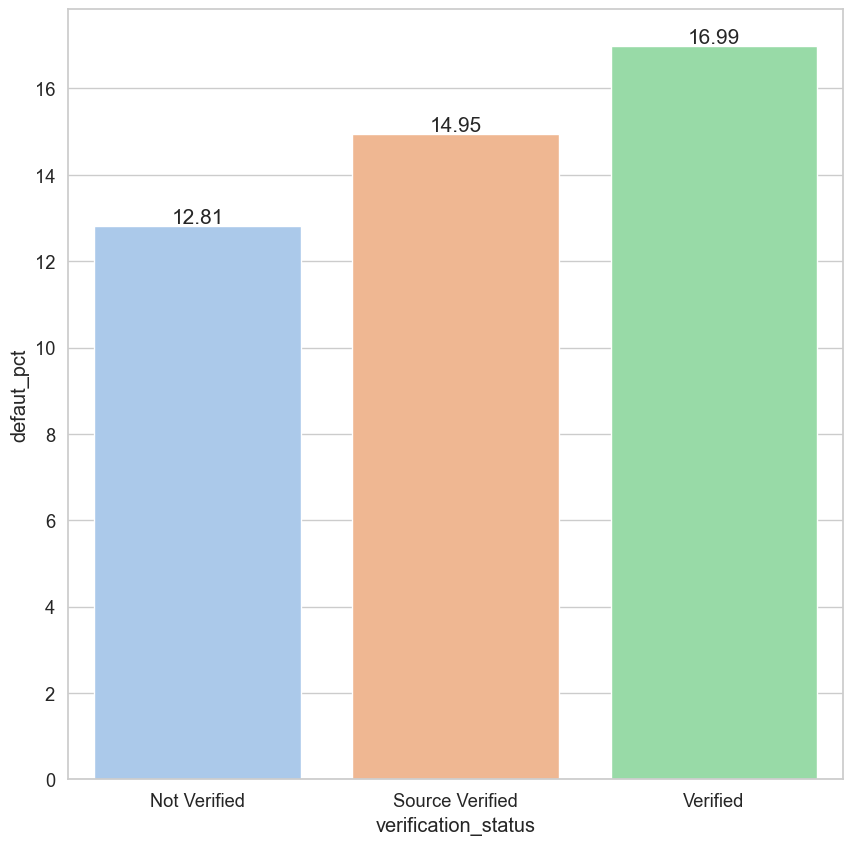

In [672]:
#POINT 1

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('verification_status').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('verification_status').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='verification_status')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(10,10))
plots = sns.barplot(data =merged_df,x='verification_status', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

               purpose  Charged Count  Paid Count  defaut_pct
8              wedding             94         814   10.352423
5       major_purchase            218        1883   10.376011
6                  car            159        1318   10.765064
2          credit_card            533        4403   10.798217
4     home_improvement            332        2403   12.138940
12            vacation             53         318   14.285714
0   debt_consolidation           2737       15028   15.406699
7              medical            105         554   15.933232
9               moving             90         474   15.957447
10               house             57         296   16.147309
1                other            613        3161   16.242713
11         educational             54         262   17.088608
13    renewable_energy             18          79   18.556701
3       small_business            469        1226   27.669617


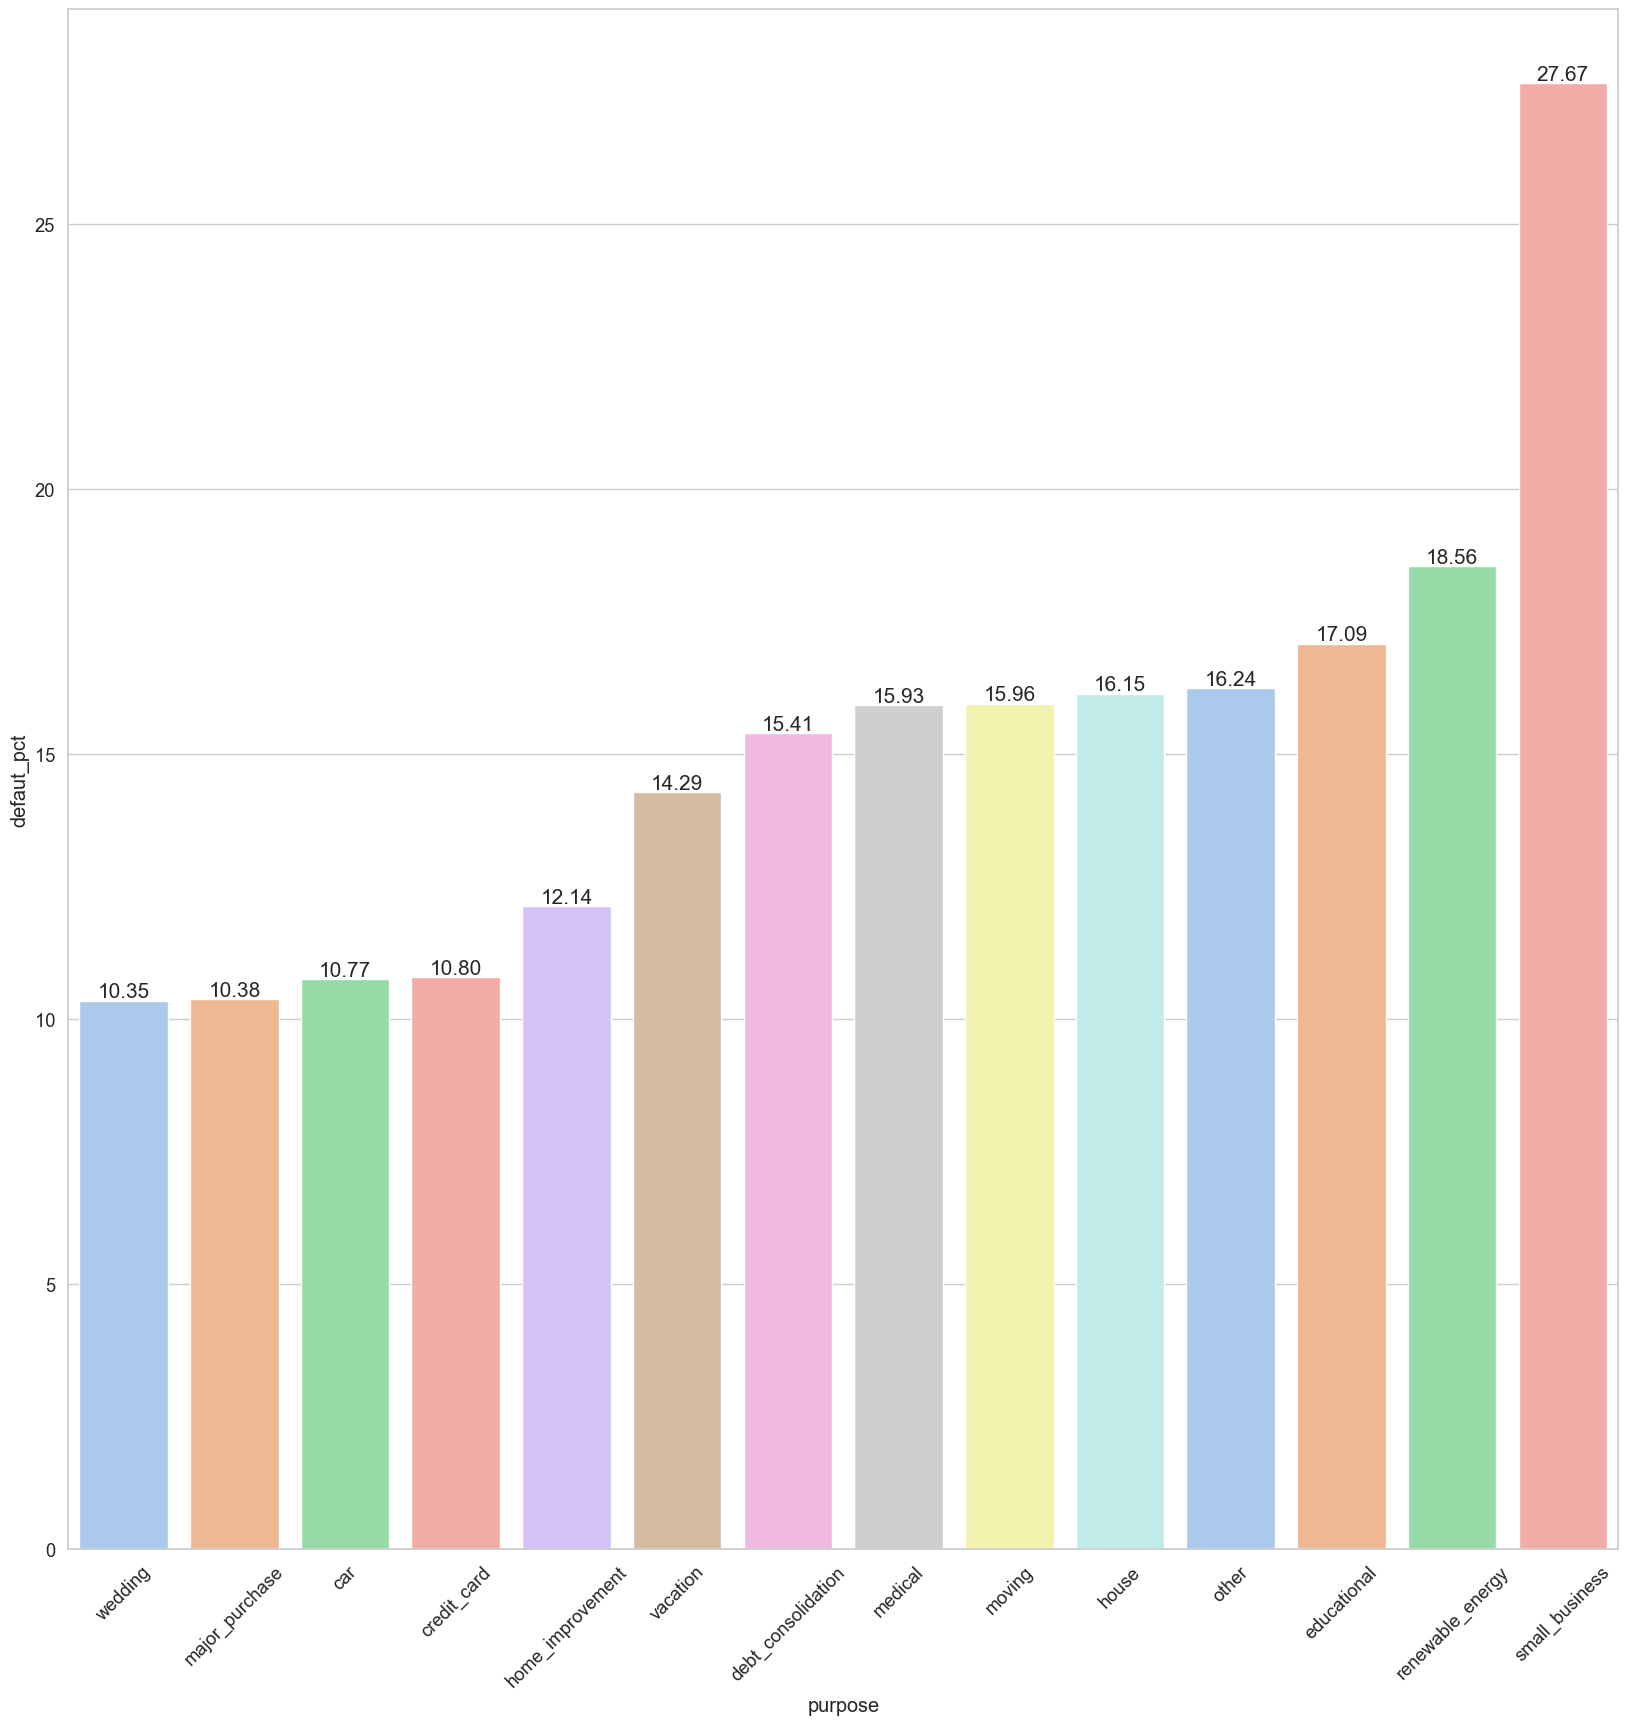

In [673]:
#POINT 7
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('purpose').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('purpose').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='purpose')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(20,20))
plots = sns.barplot(data =merged_df,x='purpose', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

   addr_state  Charged Count  Paid Count  defaut_pct
42         WY              4          76    5.000000
36         DC             15         192    7.246377
40         DE             11          99   10.000000
45         MS              2          17   10.526316
41         VT              6          47   11.320755
32         AR             26         202   11.403509
44         TN              2          15   11.764706
3          TX            305        2285   11.776062
10         MA            153        1102   12.191235
35         WV             21         151   12.209302
7          PA            177        1267   12.257618
24         AL             53         378   12.296984
29         KS             31         219   12.400000
25         LA             52         364   12.500000
34         RI             24         165   12.698413
18         CO             97         655   12.898936
11         OH            150        1012   12.908778
8          VA            175        1168   13.

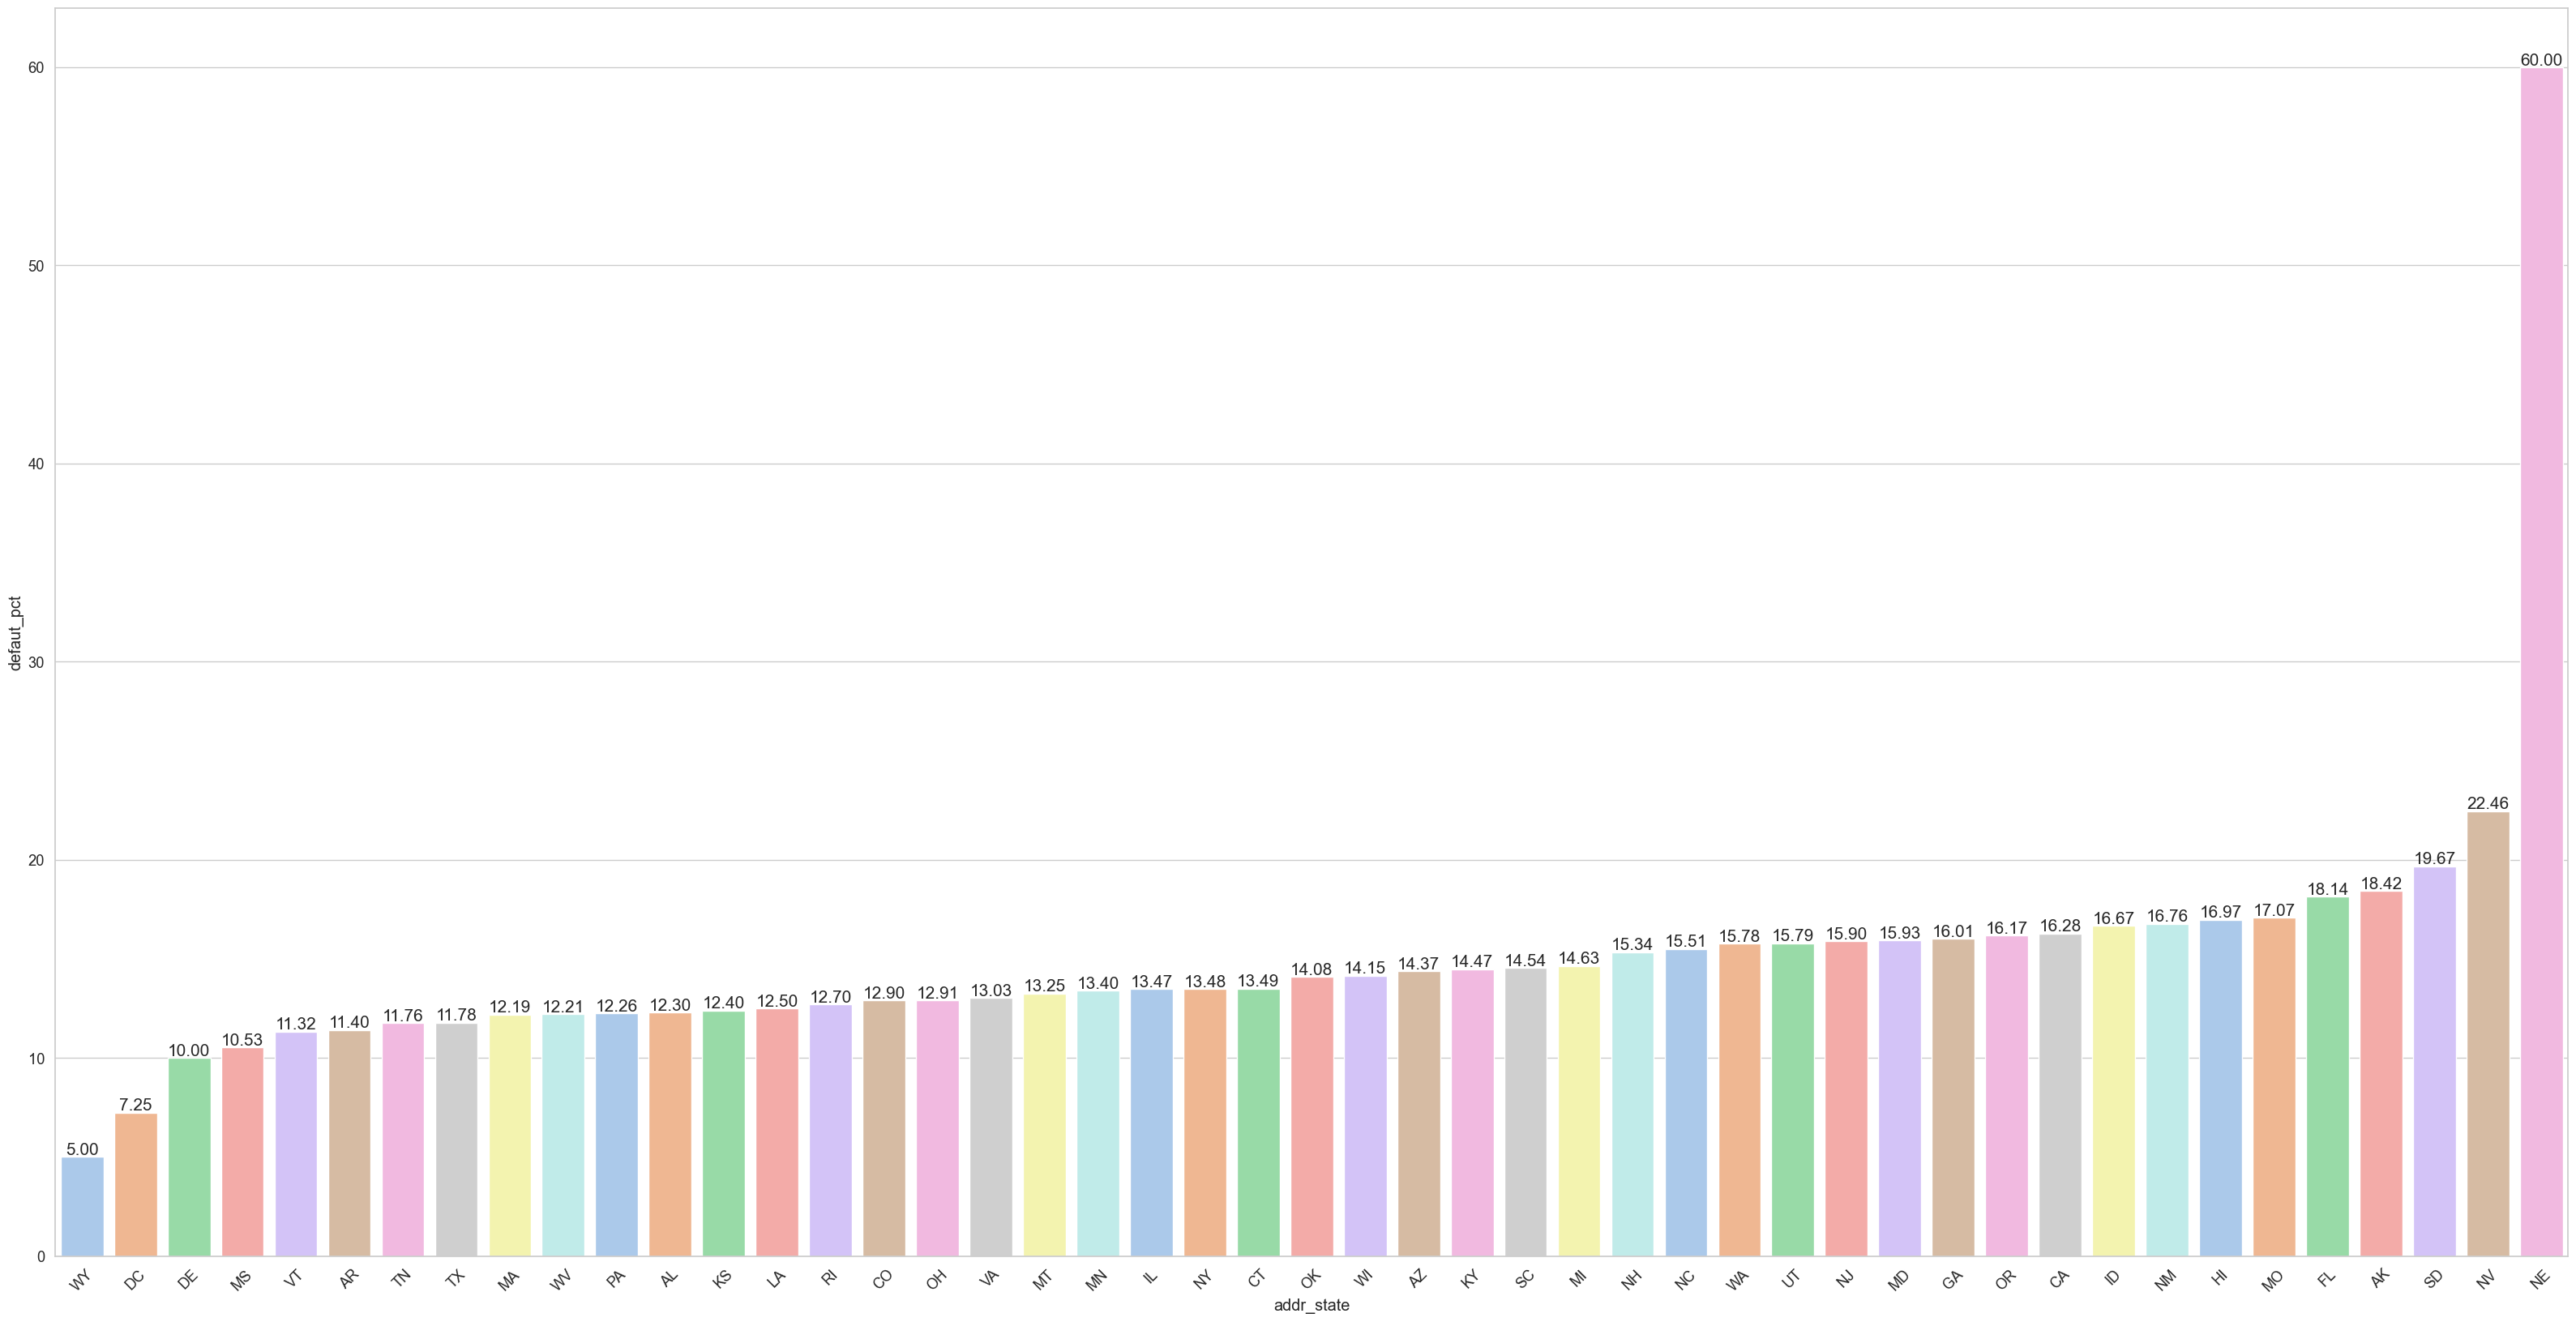

In [678]:
#POINT 2
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('addr_state').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('addr_state').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='addr_state')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(40,20))
plots =sns.barplot(data =merged_df,x='addr_state', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

    emp_length  Charged Count  Paid Count  defaut_pct
10           9            156        1048   12.956811
2            2            559        3646   13.293698
4            4            452        2817   13.826858
3            3            548        3395   13.898047
7            6            301        1825   14.158043
1            0            627        3798   14.169492
9            8            199        1197   14.255014
6            5            450        2680   14.376997
5            1            451        2664   14.478331
8            7            261        1421   15.517241
0           10           1528        7728   16.508211


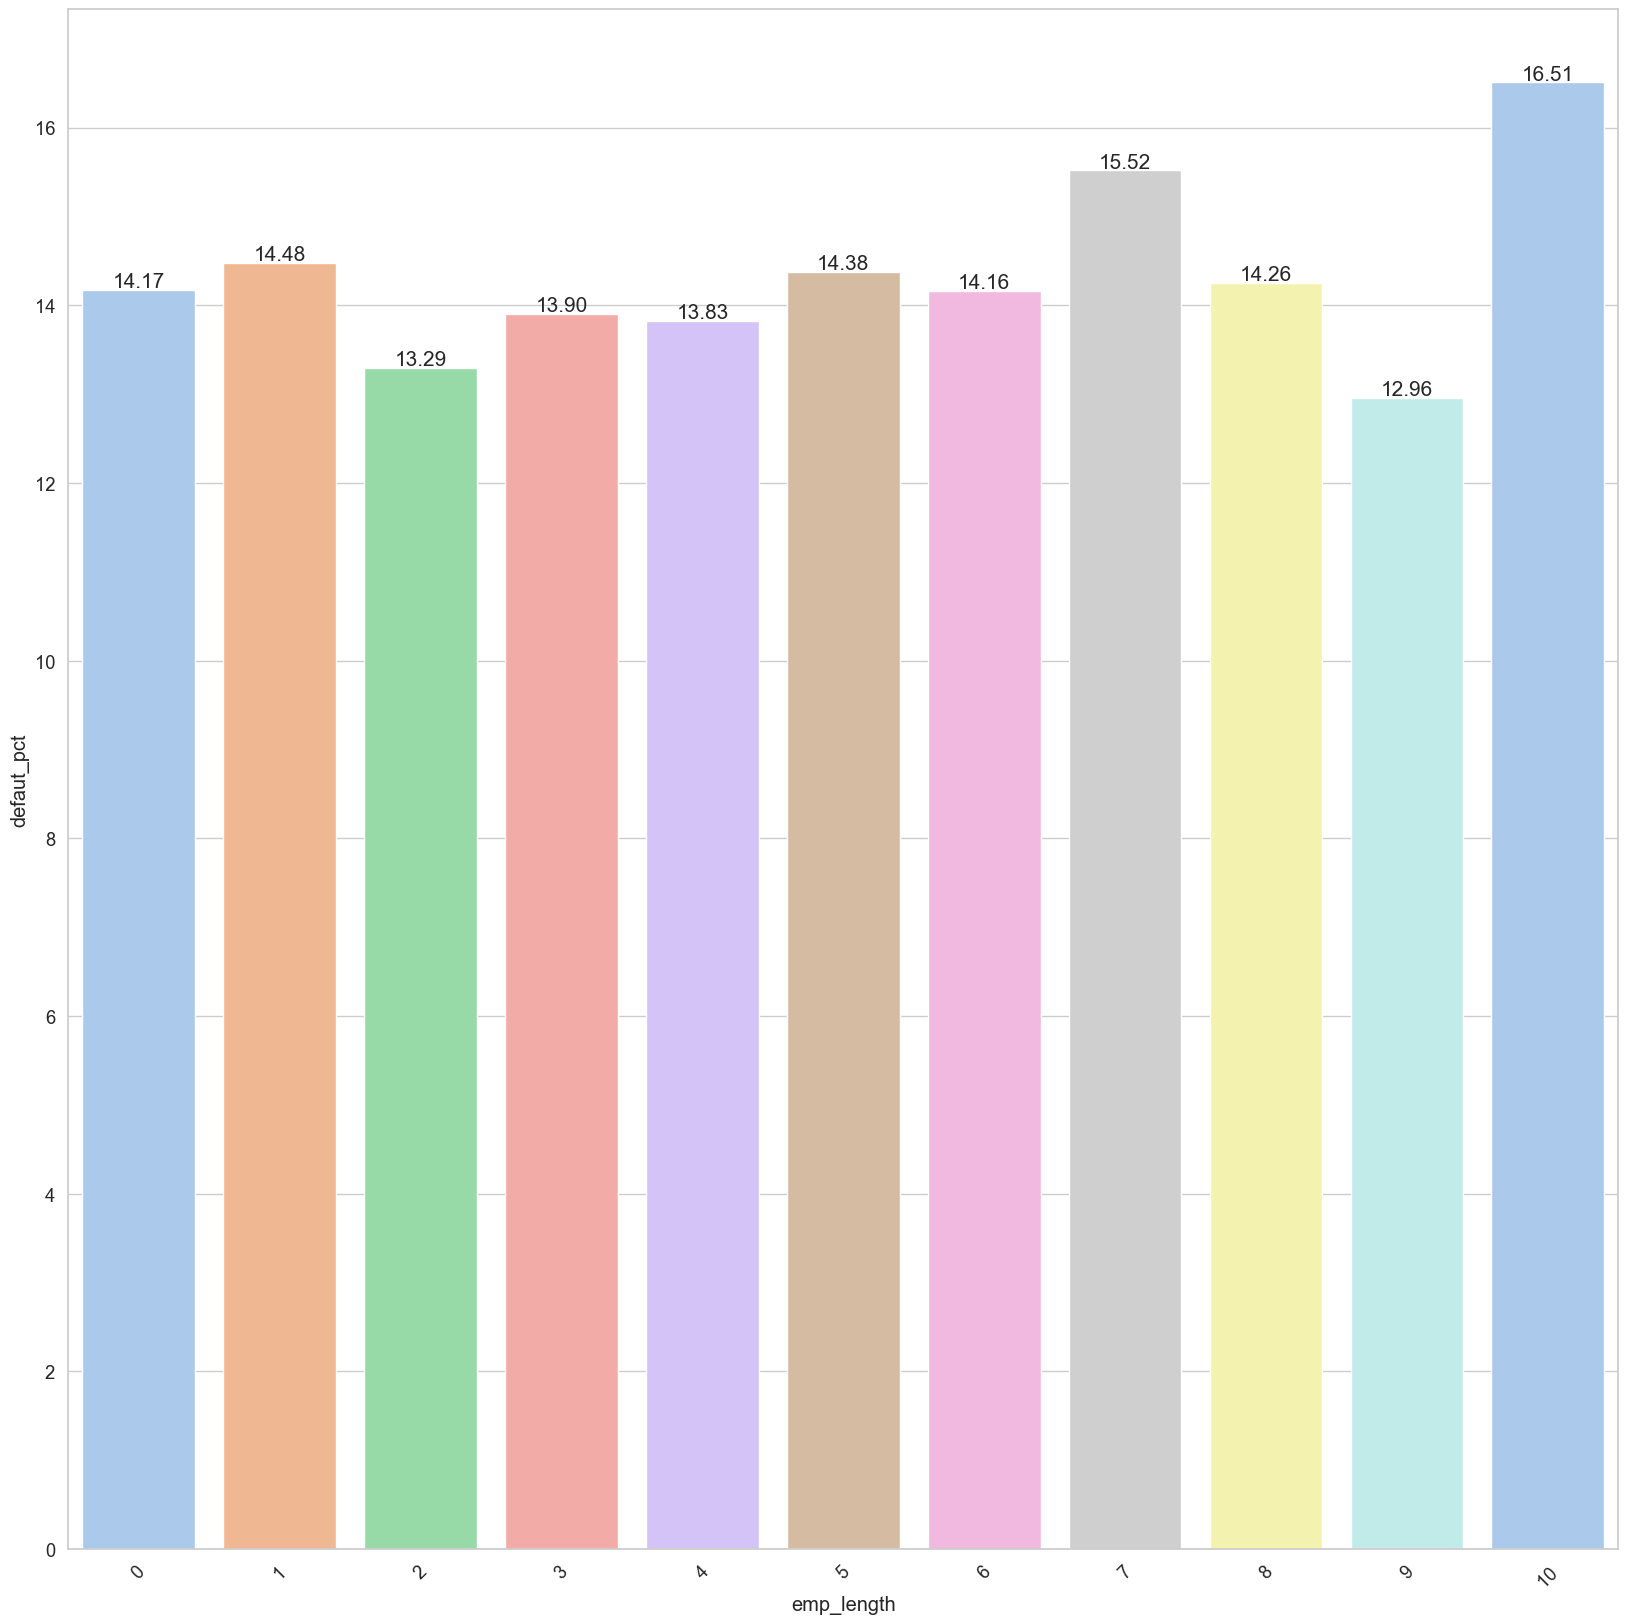

In [679]:
#POINT 3

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('emp_length').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('emp_length').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='emp_length')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(20,20))
plots = sns.barplot(data =merged_df,x='emp_length', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

   issued_year  Charged Count  Paid Count  defaut_pct
2         2009            581        4017   12.635929
1         2010           1450        9848   12.834130
3         2008            240        1289   15.696534
0         2011           3219       16869   16.024492
4         2007             42         196   17.647059


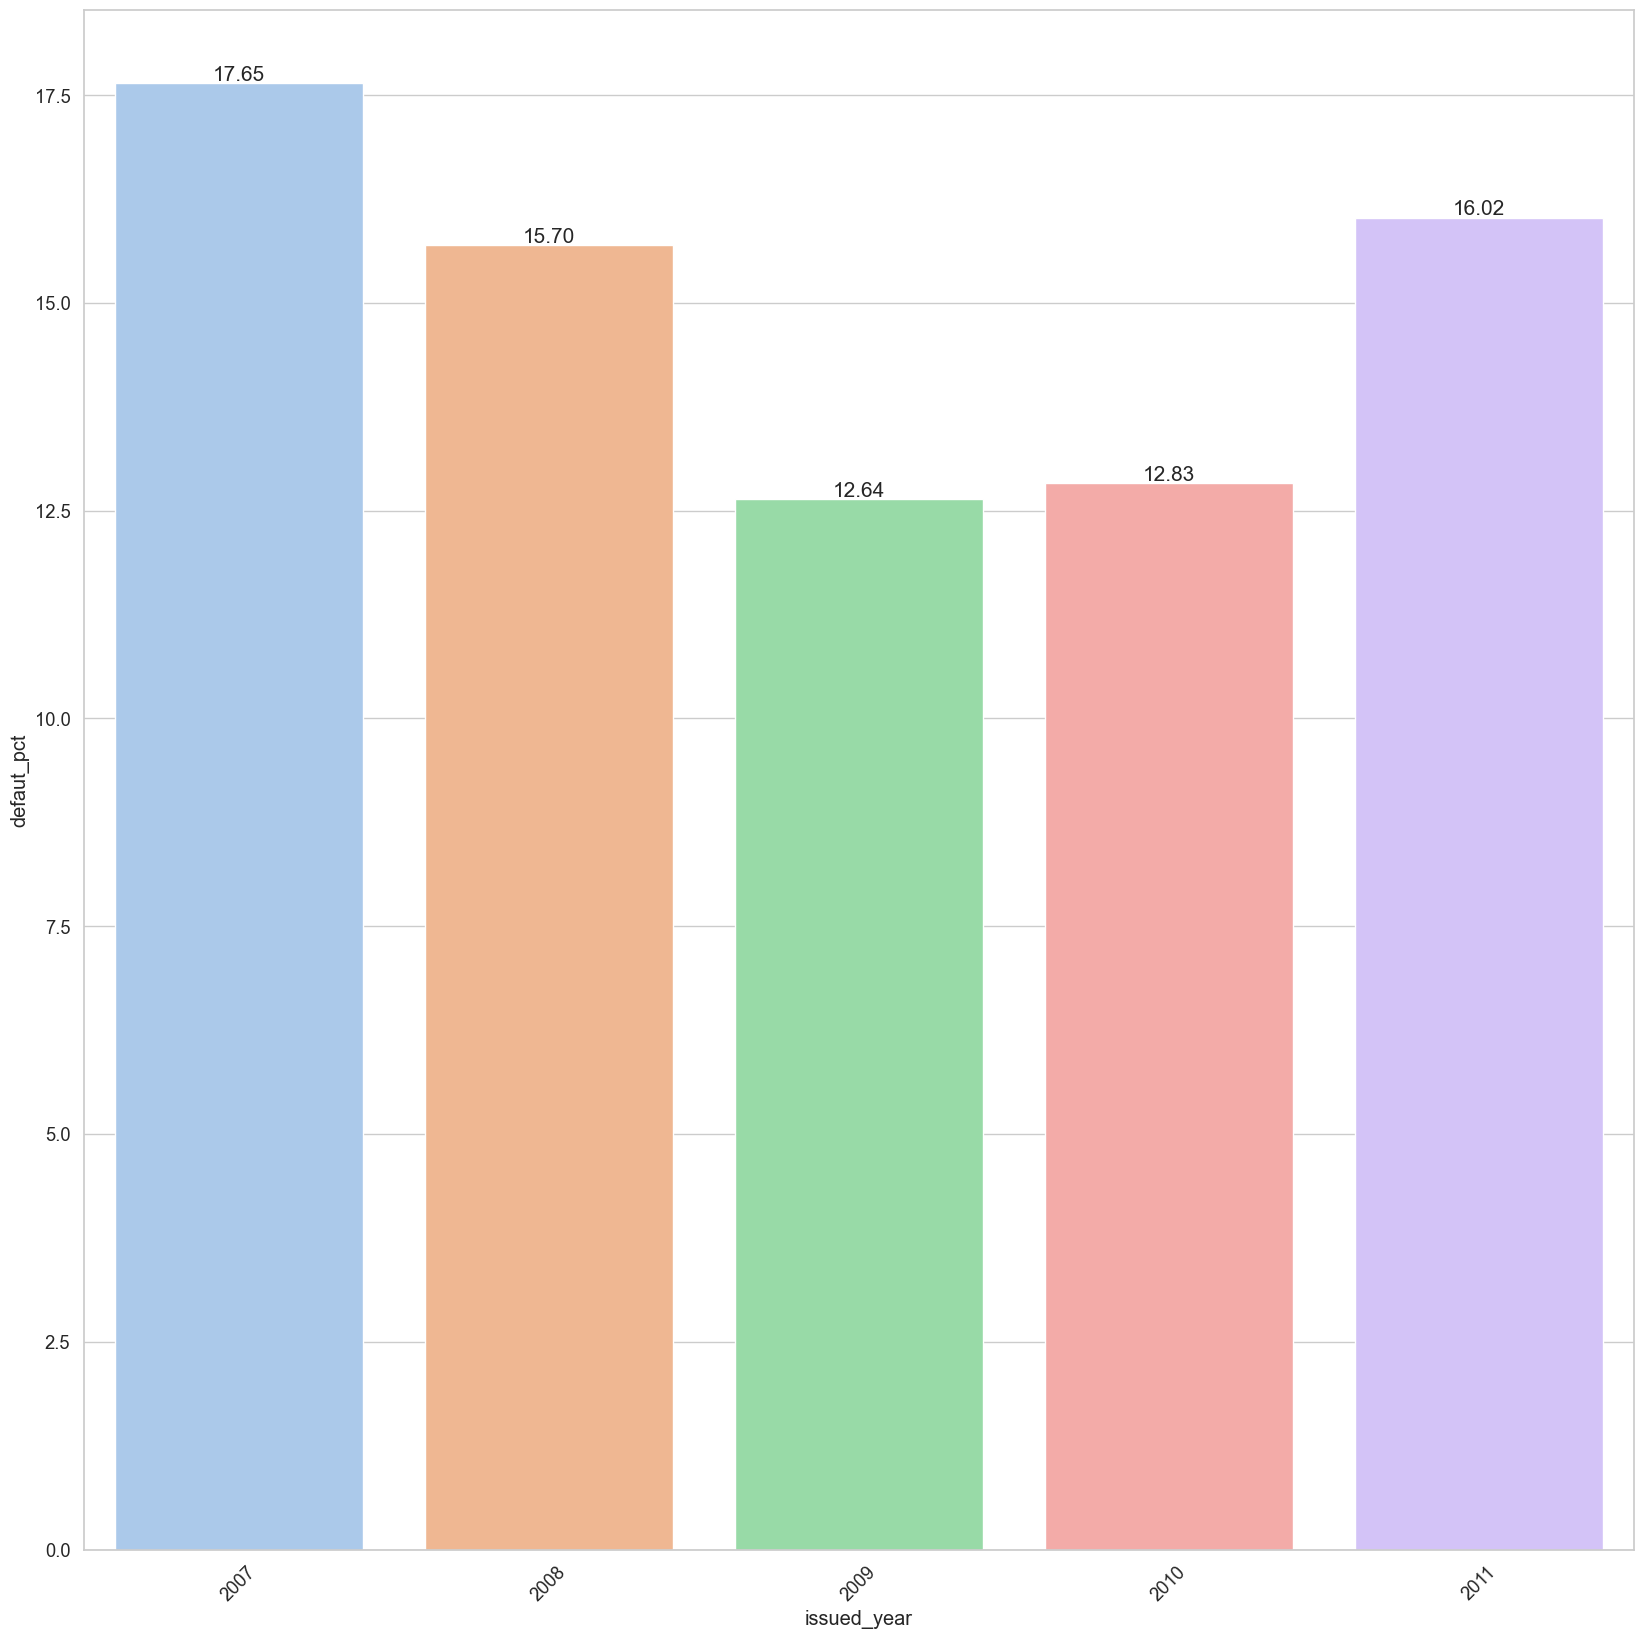

In [680]:
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('issued_year').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('issued_year').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='issued_year')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(20,20))
plots = sns.barplot(data =merged_df,x='issued_year', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

    issued_month  Charged Count  Paid Count  defaut_pct
11             2            287        2026   12.408128
9              3            339        2290   12.894637
8              4            364        2414   13.102952
10             1            316        2009   13.591398
6              8            462        2851   13.945065
5              7            470        2812   14.320536
1             11            587        3338   14.955414
4              6            472        2632   15.206186
2             10            562        3099   15.350997
3              9            541        2878   15.823340
7              5            461        2399   16.118881
0             12            671        3471   16.199903


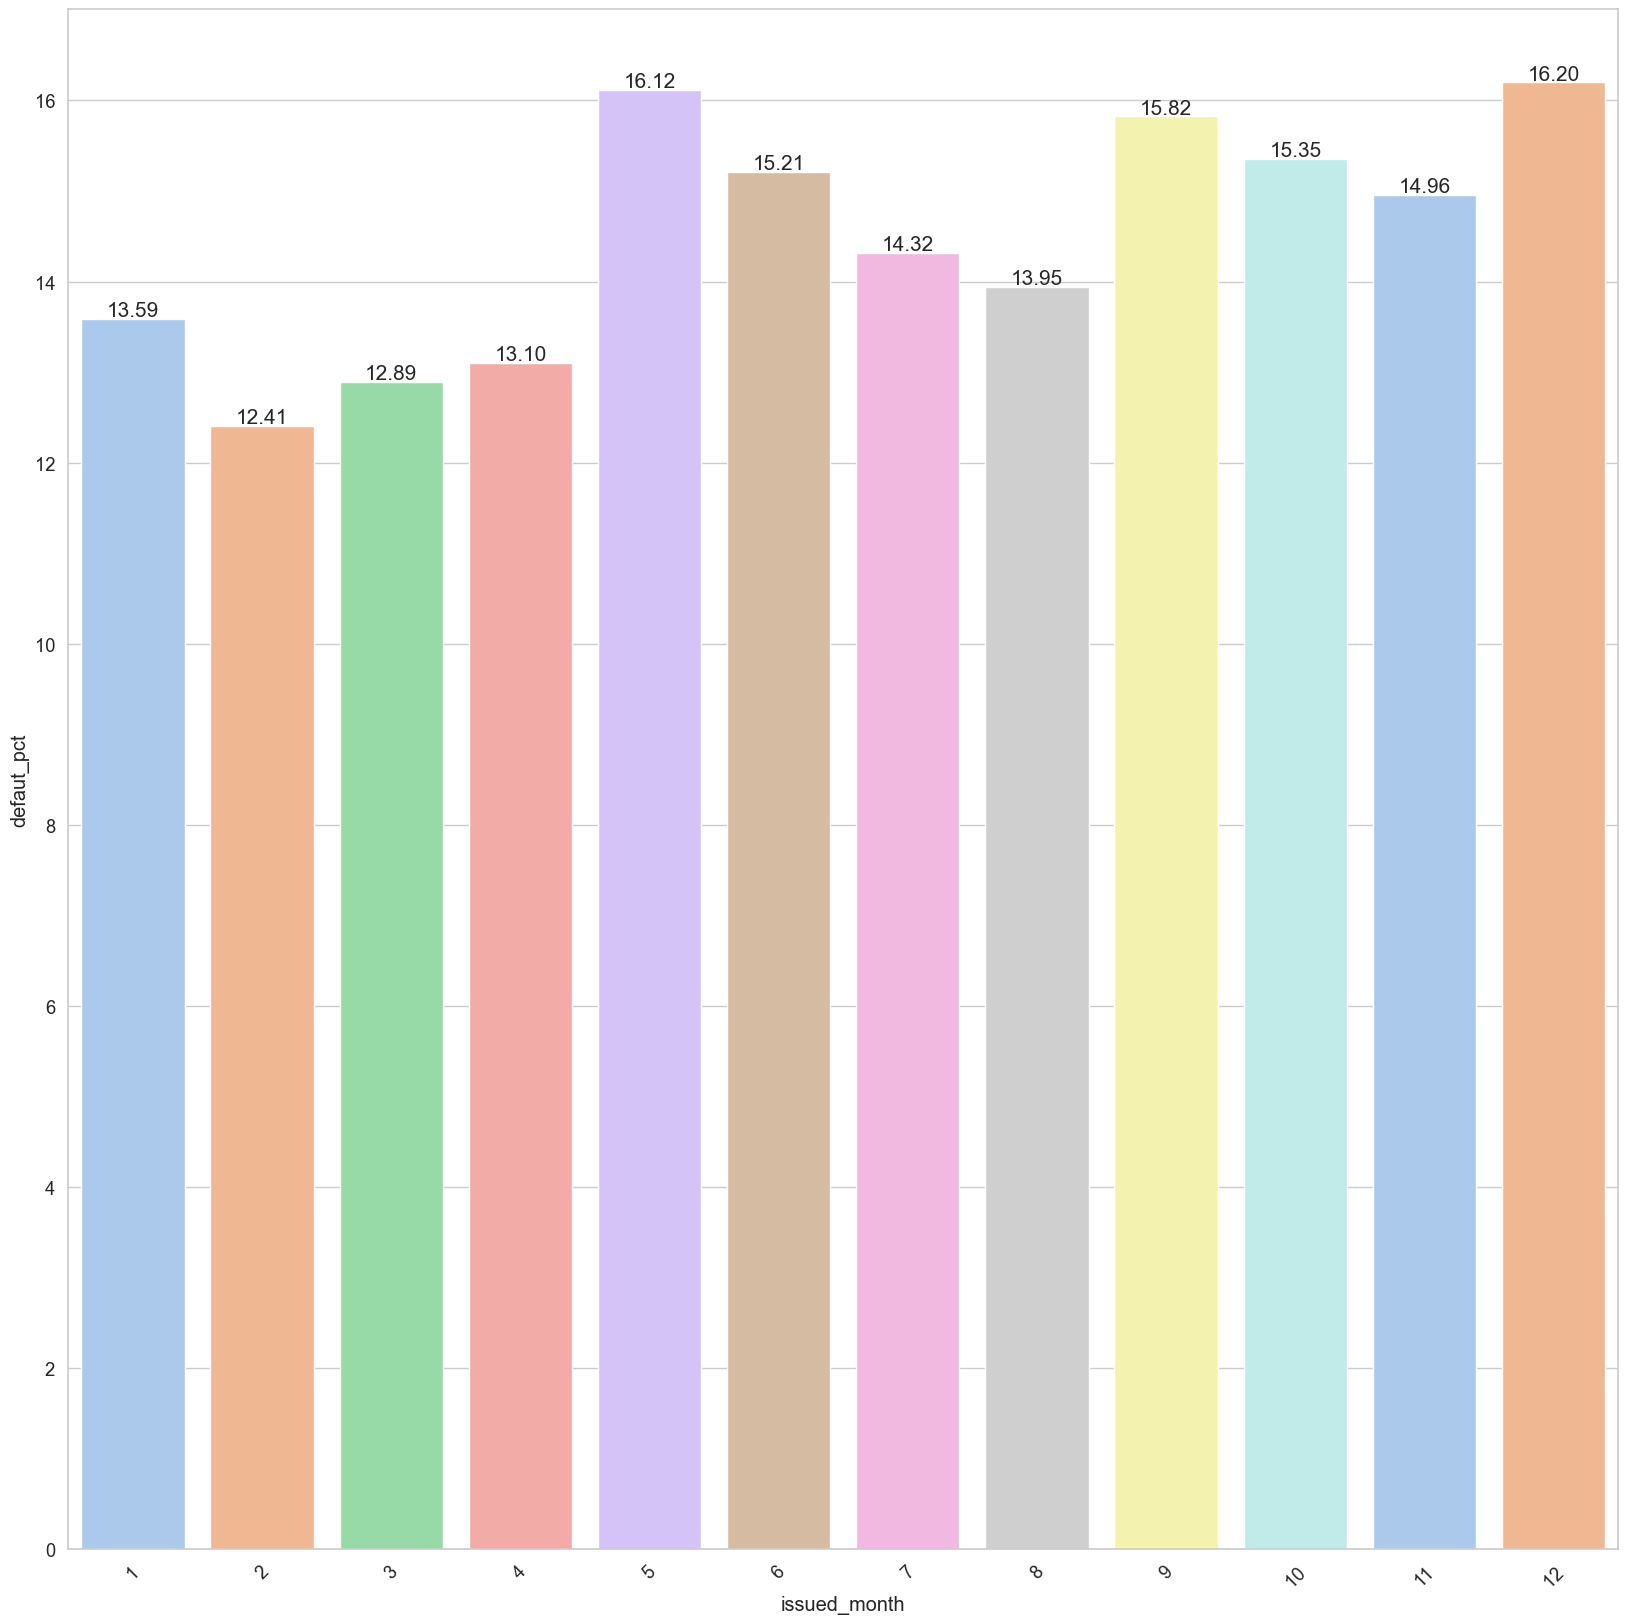

In [681]:
#POINT 10

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('issued_month').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('issued_month').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='issued_month')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(20,20))
plots = sns.barplot(data =merged_df,x='issued_month', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

   term  Charged Count  Paid Count  defaut_pct
0    36           3170       25326   11.124368
1    60           2362        6893   25.521340


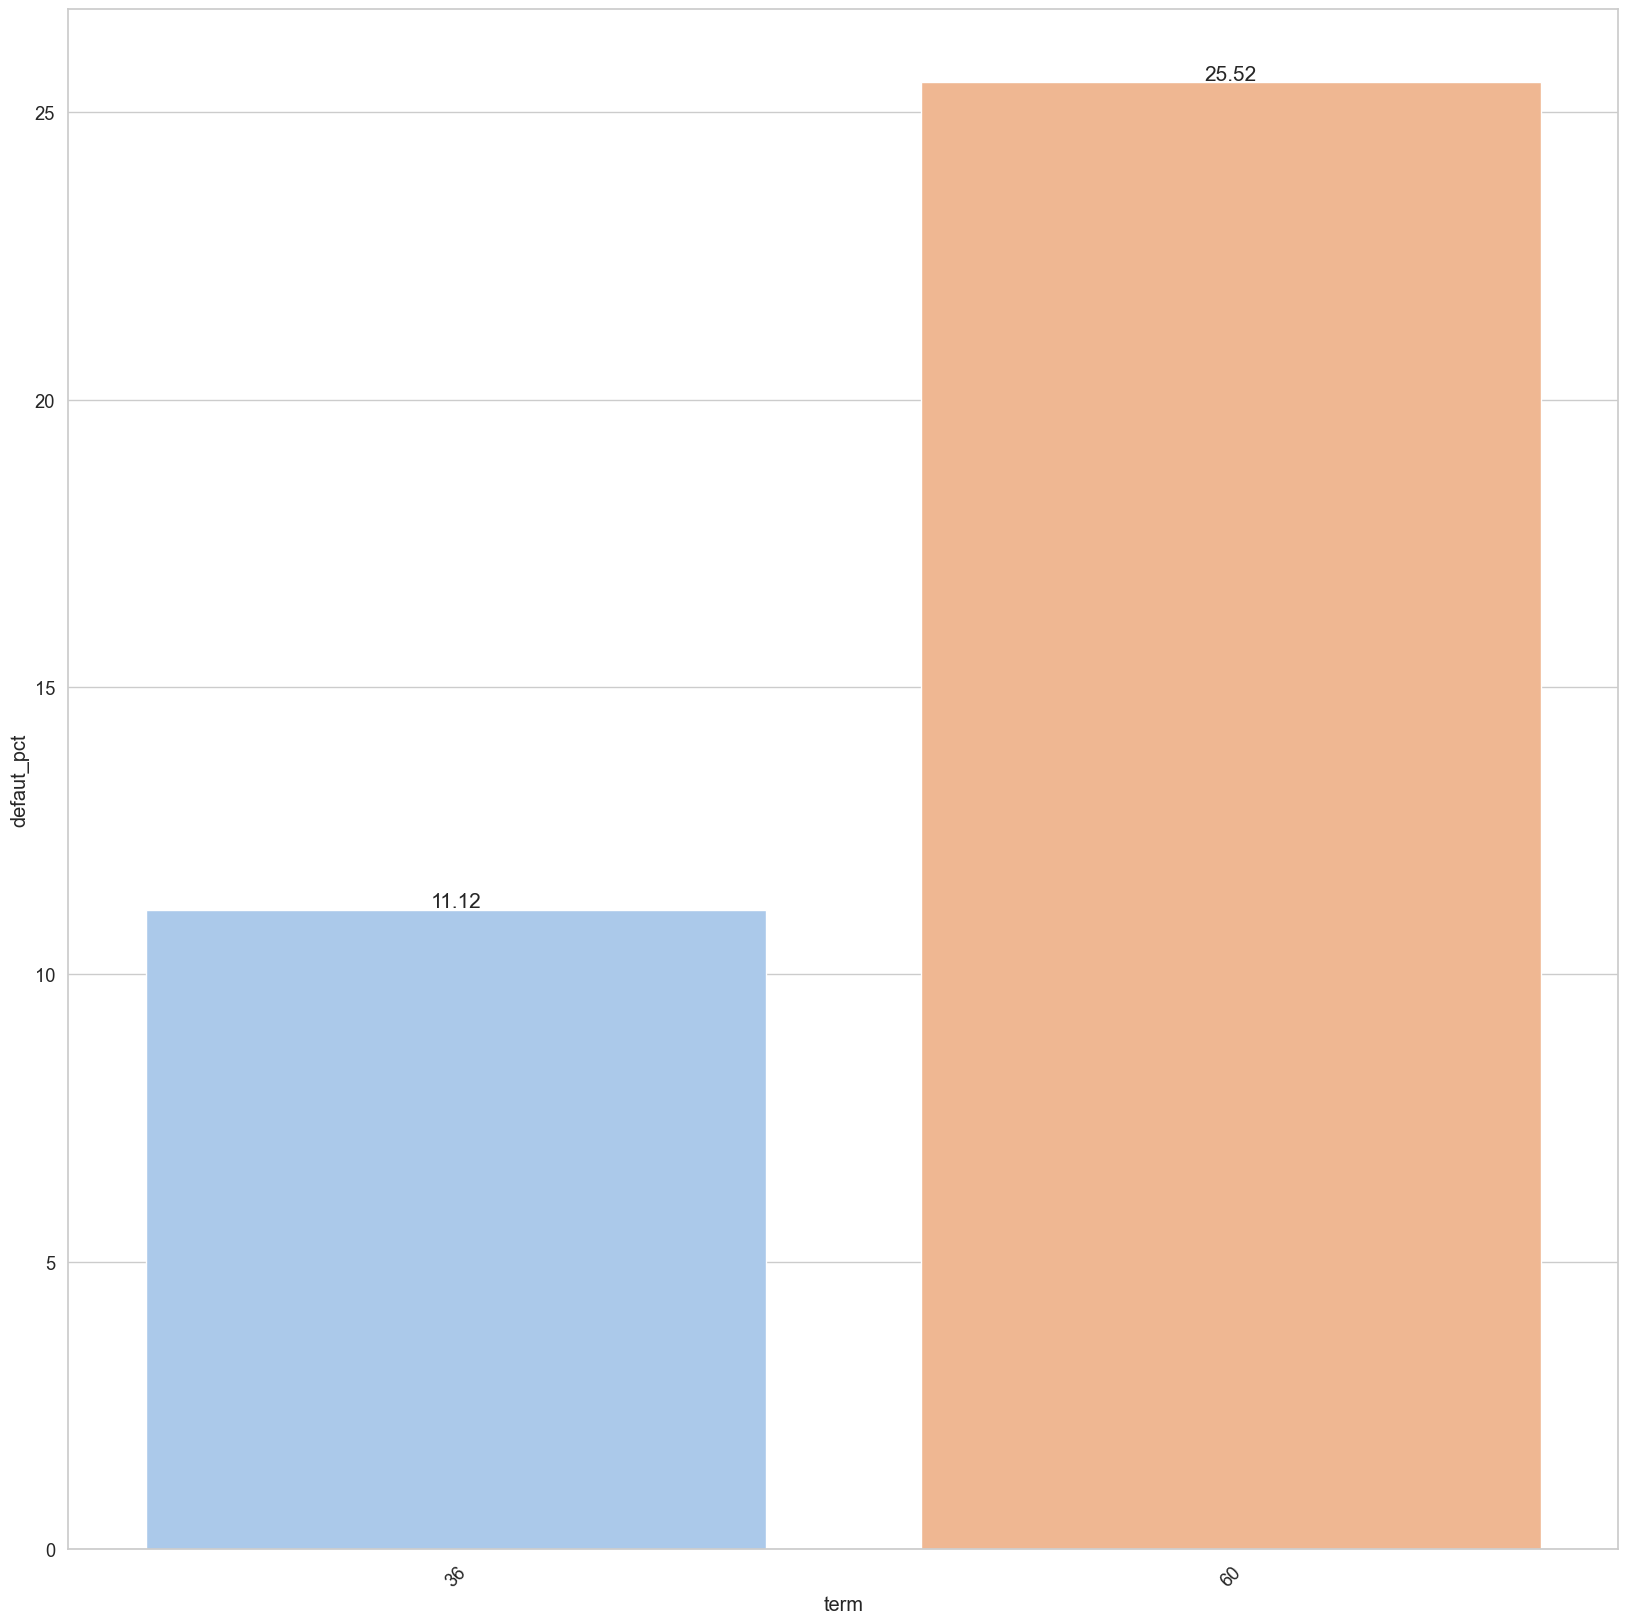

In [695]:
#POINT 12

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('term').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('term').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
#pd.DataFrame((Df_loan['verification_status'].value_counts() / len(Df_loan) * 100).round(2))

#DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
#print(DF_loanAmt_chargedOff.head())
#print(DF_loanAmt_fullyPaid.head())

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='term')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(20,20))
plots = sns.barplot(data =merged_df,x='term', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

C:\Users\deepak.sivaraman\AppData\Local\Temp\ipykernel_56204\2045874525.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=Df_loan.corr(), cmap='YlGnBu', figsize=(12,12))


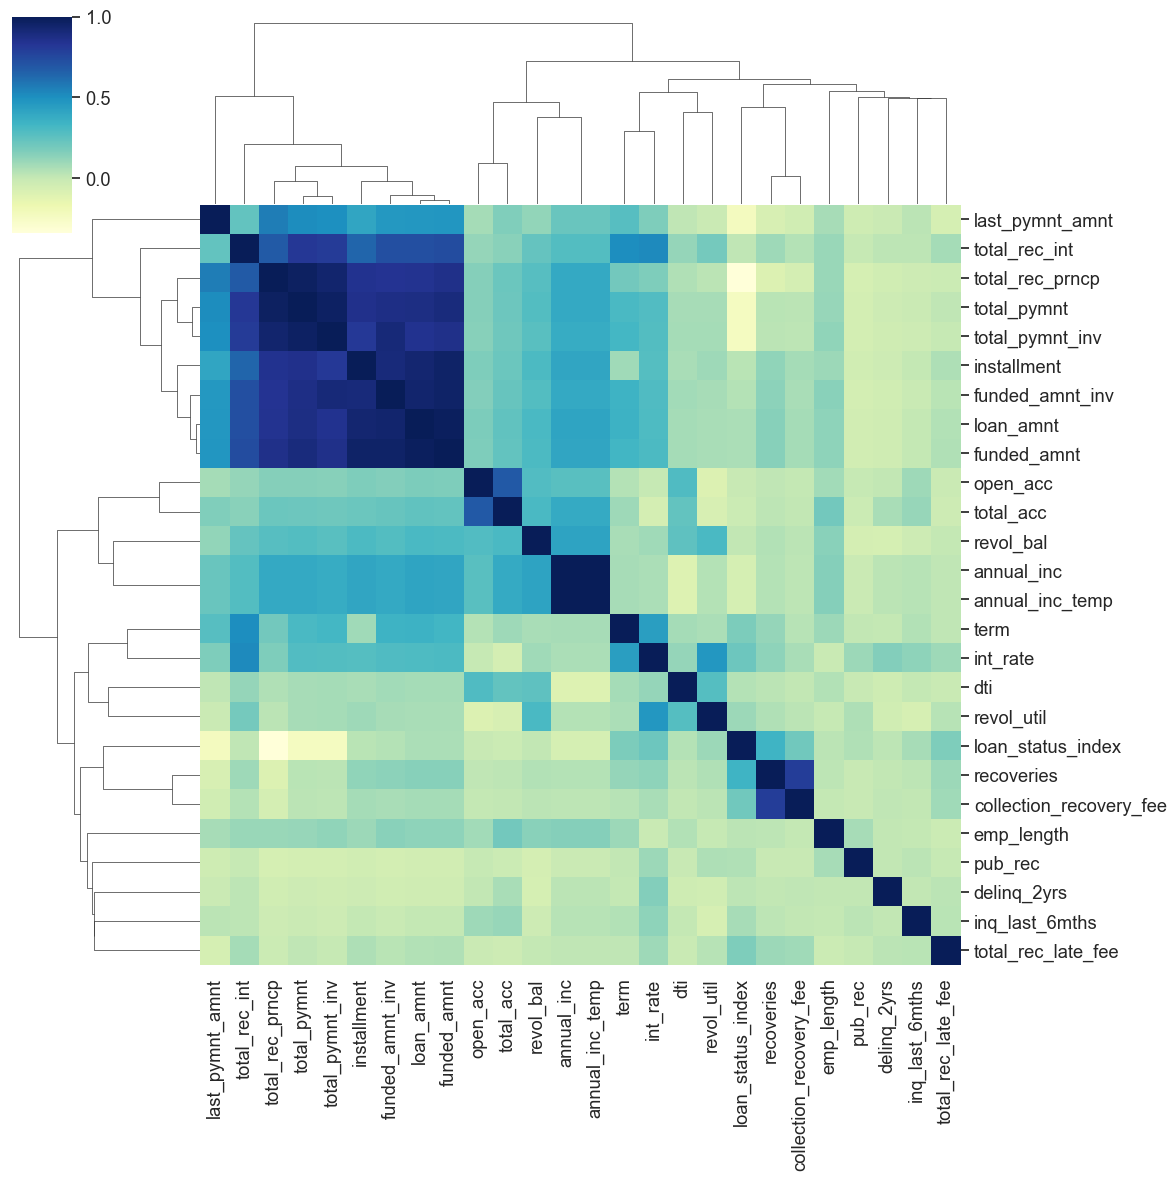

In [637]:
sns.set_style("whitegrid")
sns.clustermap(data=Df_loan.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

home_ownership       MORTGAGE     OTHER       OWN      RENT
annual_inc_groups                                          
(3999.999, 37000.0]  0.177258  0.200000  0.170757  0.187053
(37000.0, 50000.0]   0.156579  0.166667  0.154446  0.155002
(50000.0, 65000.0]   0.157474  0.222222  0.140281  0.144215
(65000.0, 87048.0]   0.130785  0.250000  0.137592  0.128641
(87048.0, 186996.0]  0.110121  0.058824  0.114213  0.115311


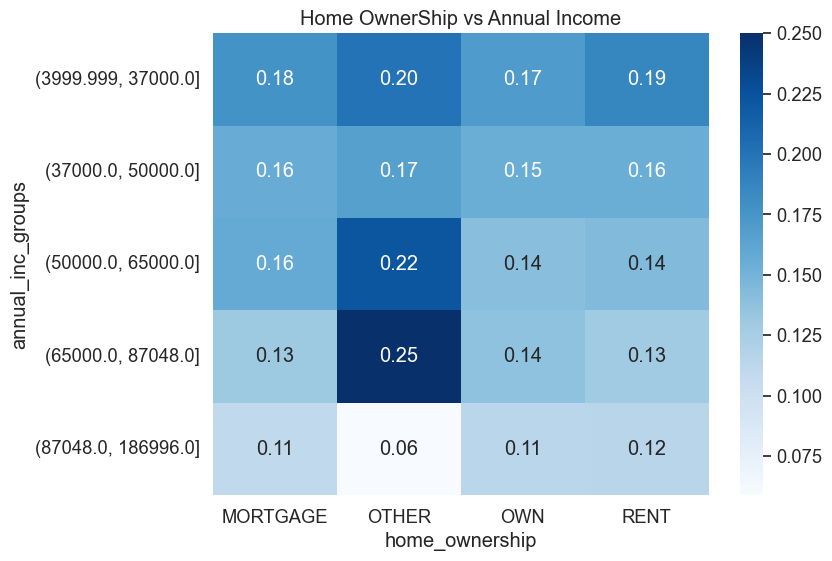

In [692]:
Df_loan['loan_status_index'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
fig, ax = plt.subplots(figsize=(8,6))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='home_ownership')

print(pivot_table)
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Home OwnerShip vs Annual Income')
plt.show()

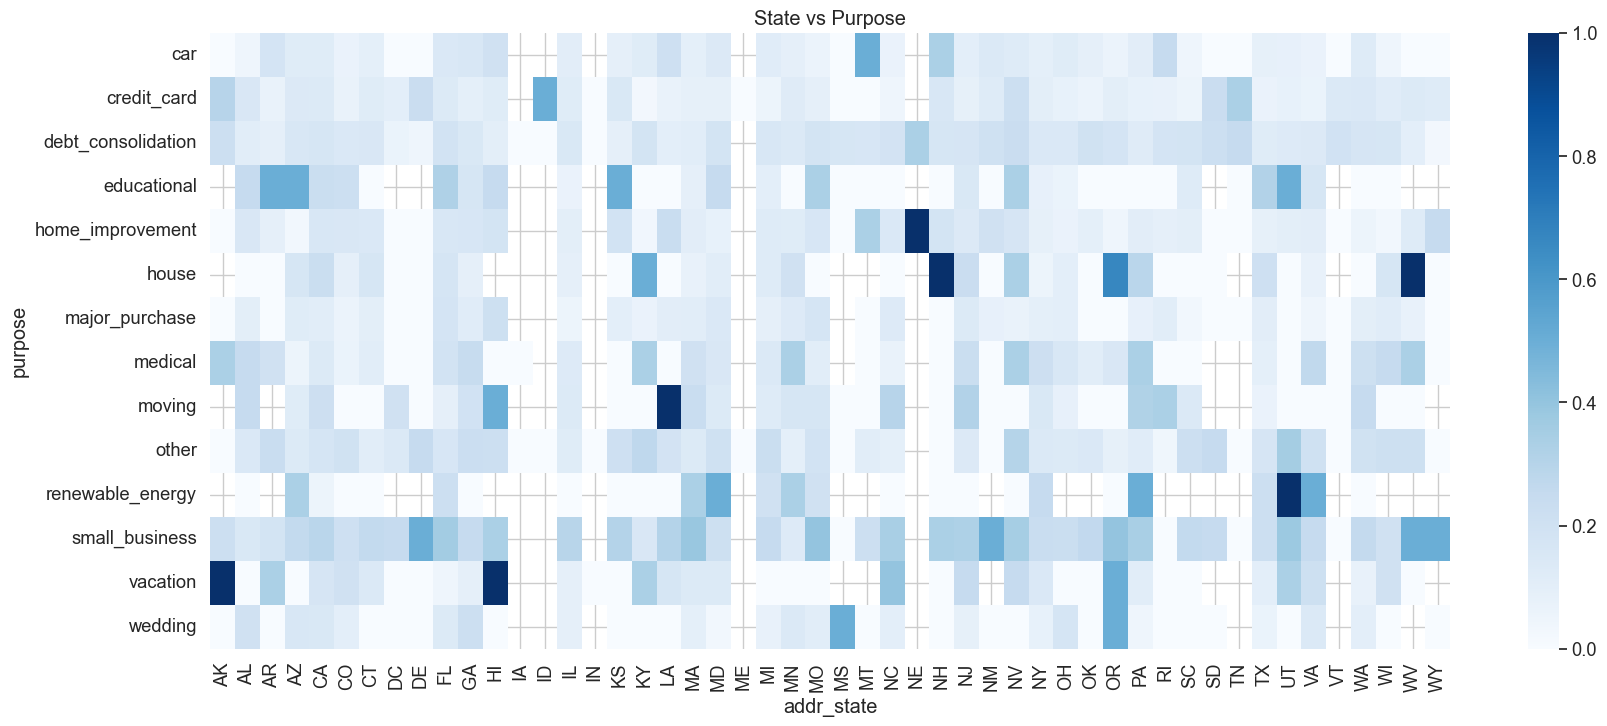

In [688]:
#POINT 2.1

#Df_loan['loan_status_index'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
fig, ax = plt.subplots(figsize=(20,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='purpose', columns='addr_state')

sns.heatmap(pivot_table, annot=False, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('State vs Purpose')
plt.show()

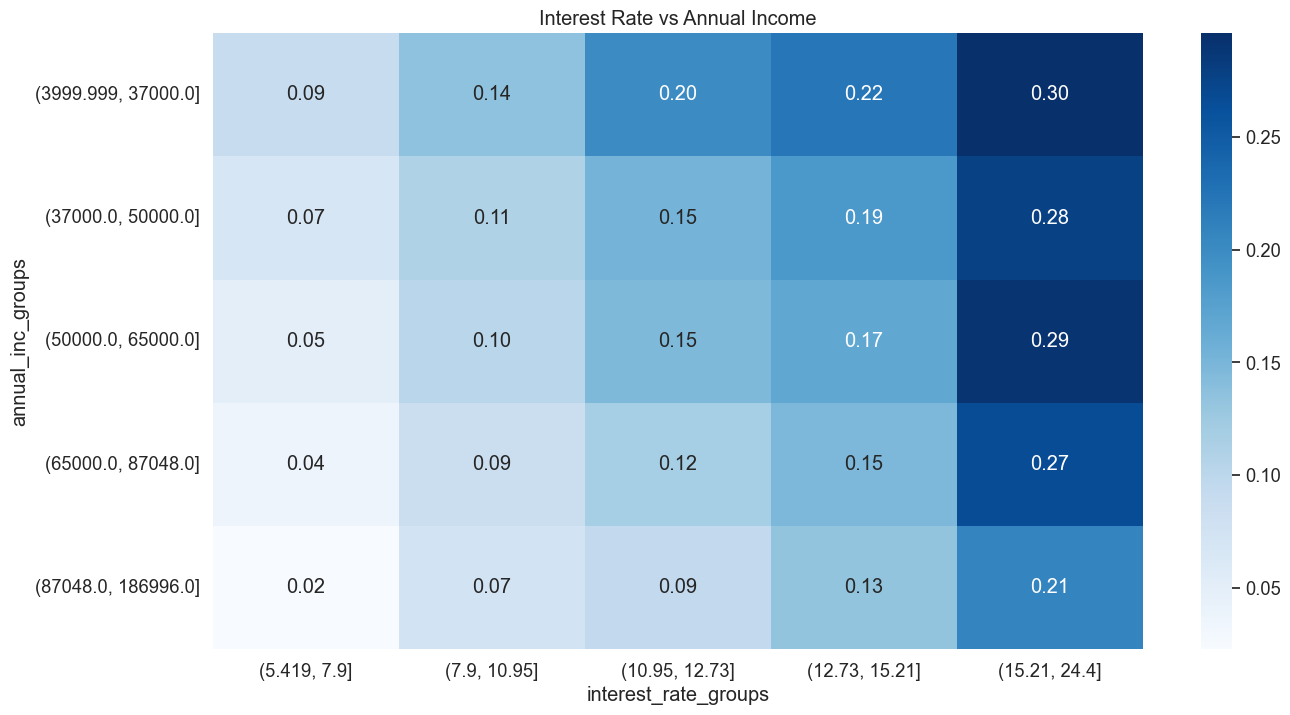

In [689]:
fig, ax = plt.subplots(figsize=(15,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='interest_rate_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Interest Rate vs Annual Income')
plt.show()

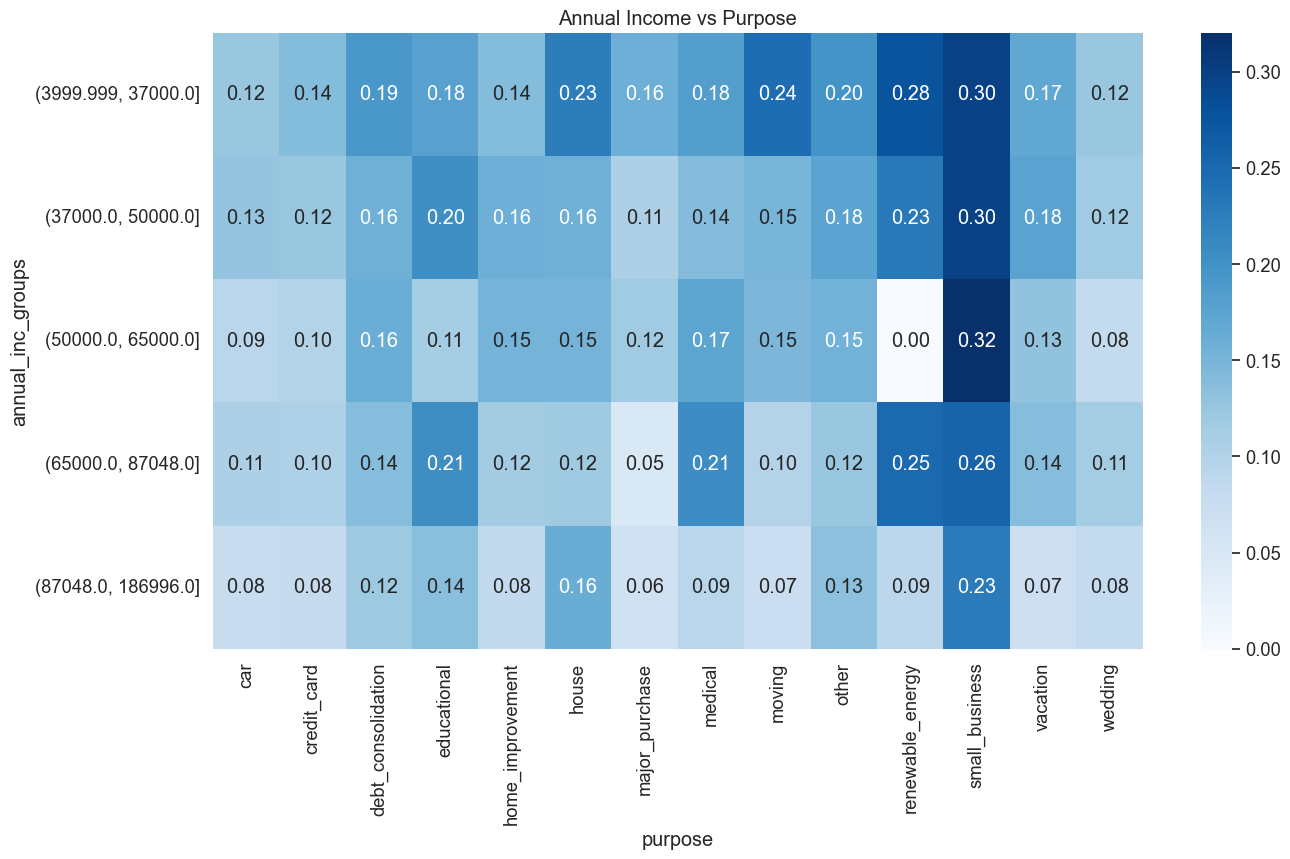

In [633]:
#POINT 8
fig, ax = plt.subplots(figsize=(15,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='purpose')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Annual Income vs Purpose')
plt.show()

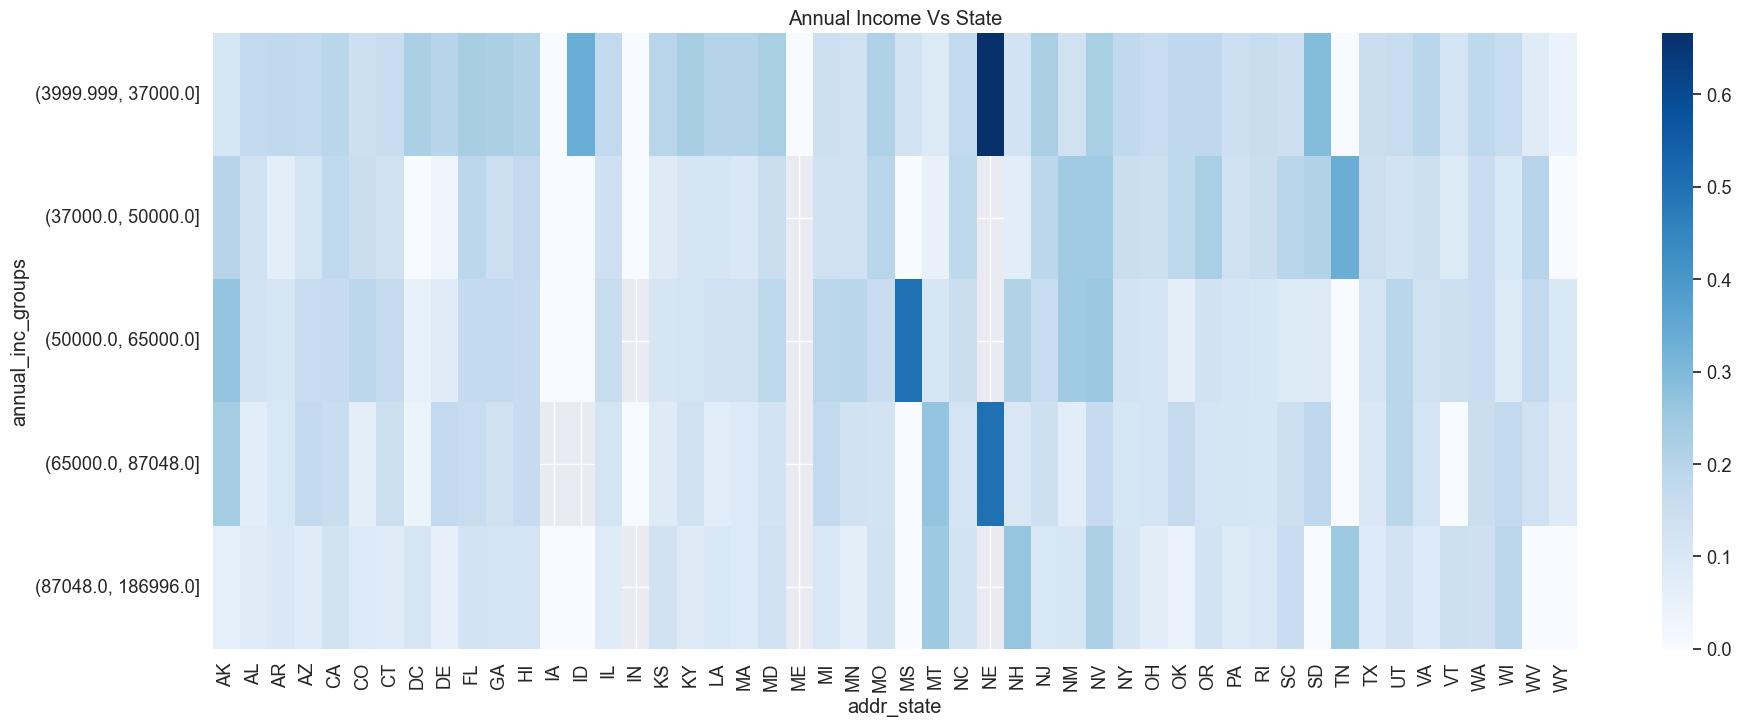

In [634]:
#POINT 9
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='addr_state')

sns.heatmap(pivot_table, annot=False, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Annual Income Vs State')
plt.show()

In [641]:
Df_loan['installment_groups'] = pd.qcut(Df_loan['installment'], q=5)
Df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,annual_inc_temp,annual_inc_groups,interest_rate_groups,loan_amt_groups,interest_rate_groups1,annual_inc_groups1,rv_util_groups,loan_status_index,installment_groups
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,171.62,24000.0,"(3999.999, 37000.0]","(7.9, 10.95]","(499.999, 5000.0]","(7.9, 10.95]","(3999.999, 37000.0]","(77.0, 100.0]",0,"(148.51, 226.06]"
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,119.66,30000.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(-1.0, 20.0]",1,"(15.689, 148.51]"
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,649.91,12252.0,"(3999.999, 37000.0]","(15.21, 24.4]","(499.999, 5000.0]","(15.21, 24.4]","(3999.999, 37000.0]","(77.0, 100.0]",0,"(15.689, 148.51]"
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,357.48,49200.0,"(37000.0, 50000.0]","(12.73, 15.21]","(7500.0, 11000.0]","(12.73, 15.21]","(37000.0, 50000.0]","(20.0, 40.0]",0,"(325.66, 472.32]"
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,161.03,36000.0,"(3999.999, 37000.0]","(5.419, 7.9]","(499.999, 5000.0]","(5.419, 7.9]","(3999.999, 37000.0]","(20.0, 40.0]",0,"(148.51, 226.06]"


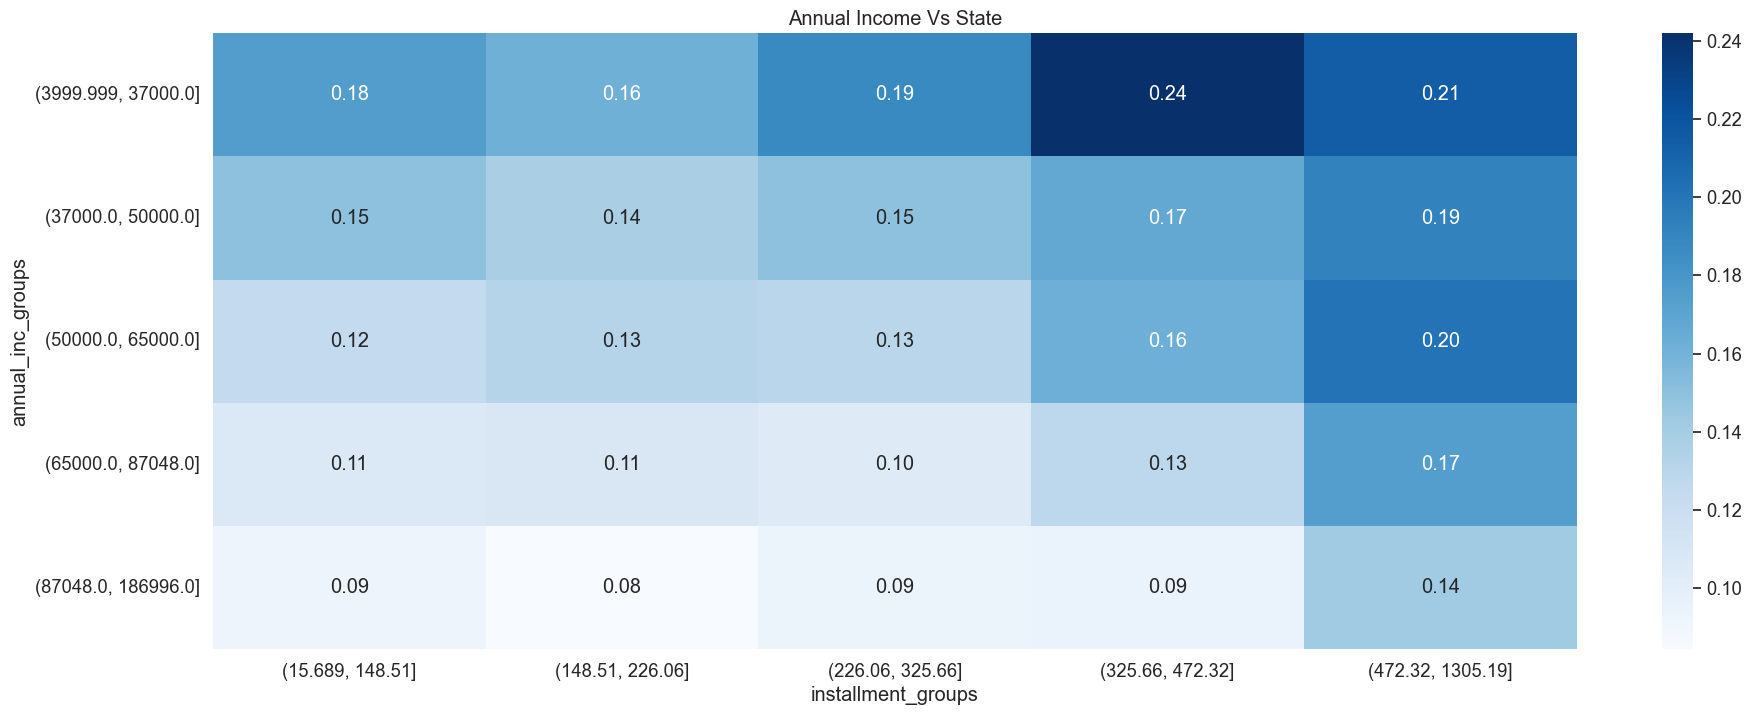

In [651]:
#POINT 11

fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='installment_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Installments Vs Annual Income')
plt.show()

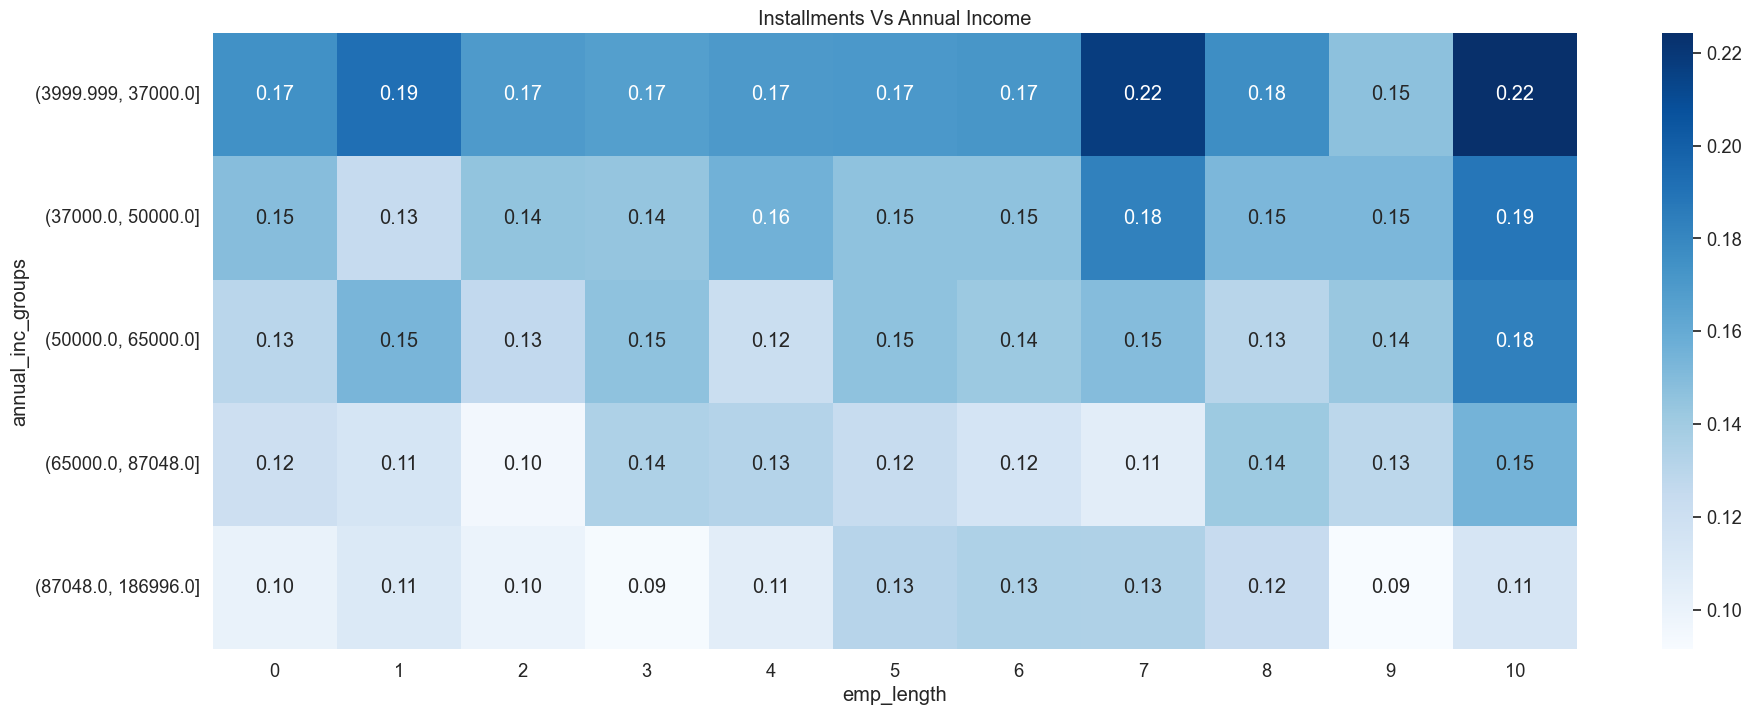

In [652]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='emp_length')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Installments Vs Annual Income')
plt.show()

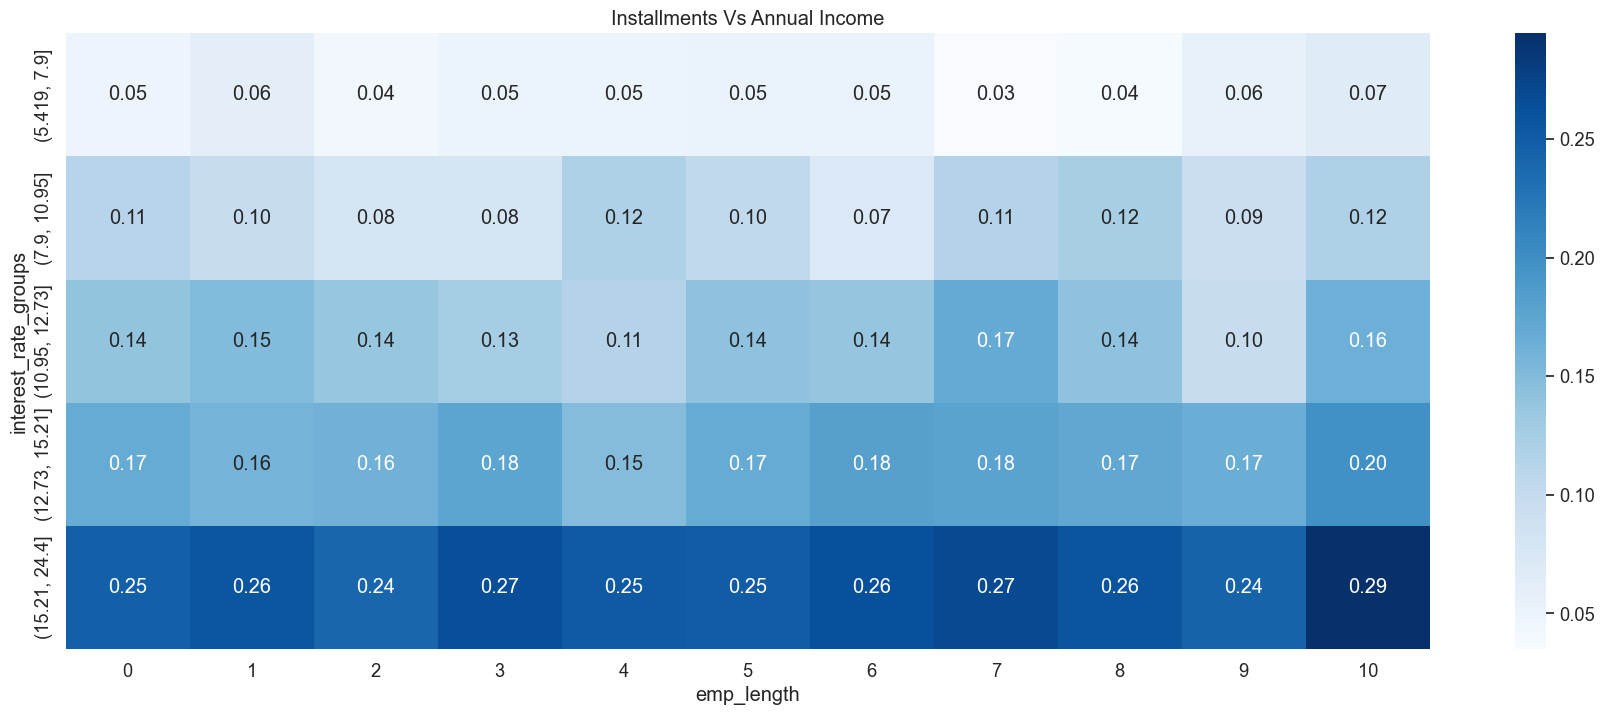

In [656]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='interest_rate_groups', columns='emp_length')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Interest Rate Vs Employment Length')
plt.show()

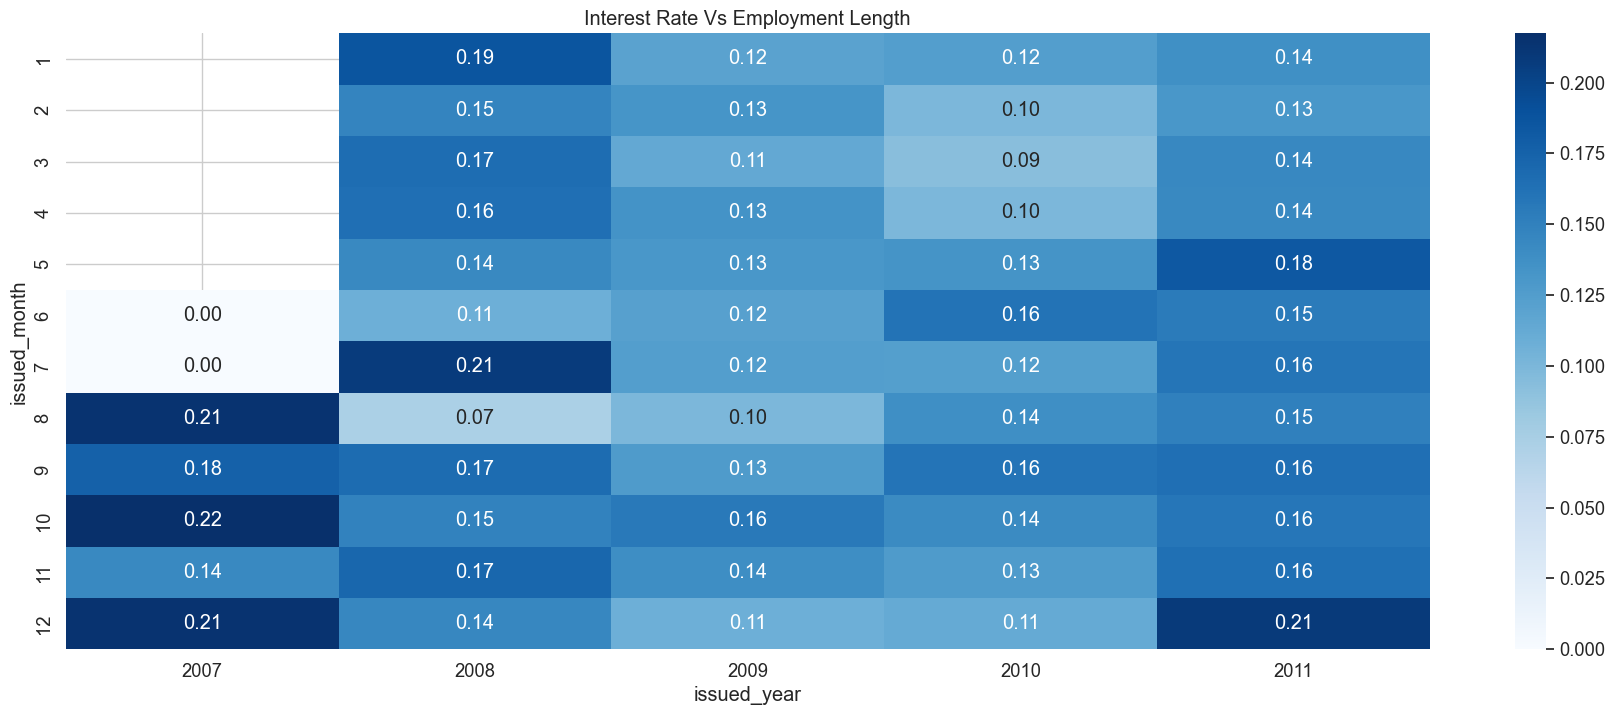

In [661]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='issued_month', columns='issued_year')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Interest Rate Vs Employment Length')
plt.show()

home_ownership      MORTGAGE     OTHER       OWN      RENT
purpose                                                   
car                 0.097493  0.500000  0.102041  0.119672
credit_card         0.105926  0.181818  0.129825  0.106928
debt_consolidation  0.155241  0.157895  0.154828  0.153018
educational         0.127907  0.000000  0.250000  0.183575
home_improvement    0.116644  0.200000  0.132686  0.146825
house               0.140625  0.000000  0.093750  0.187500
major_purchase      0.083616  0.000000  0.109649  0.121181
medical             0.150000  0.000000  0.153846  0.170418
moving              0.075472  1.000000  0.222222  0.174419
other               0.132146  0.166667  0.161560  0.182393
renewable_energy    0.169811       NaN  0.100000  0.235294
small_business      0.246190  0.400000  0.343137  0.301370
vacation            0.098485       NaN  0.137931  0.171429
wedding             0.121771  0.000000  0.056604  0.099485


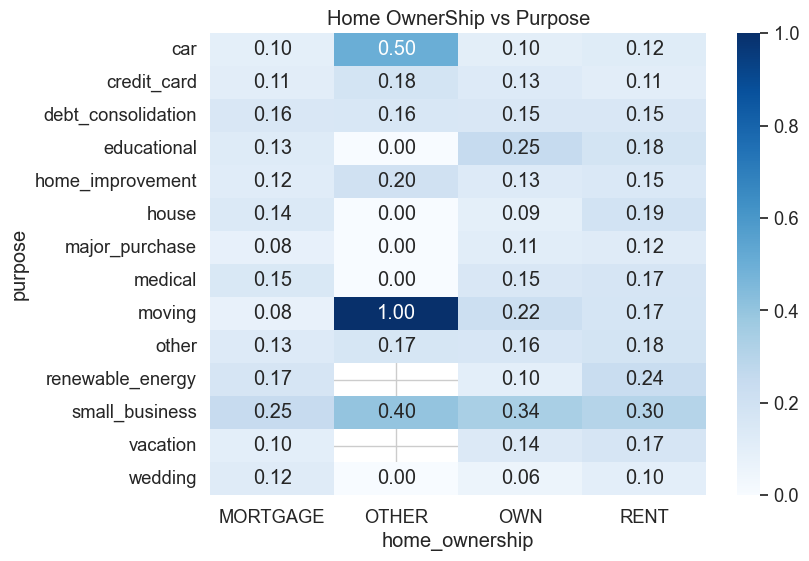

In [706]:
Df_loan['loan_status_index'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
fig, ax = plt.subplots(figsize=(8,6))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='purpose', columns='home_ownership')

print(pivot_table)
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Home OwnerShip vs Purpose')
plt.show()

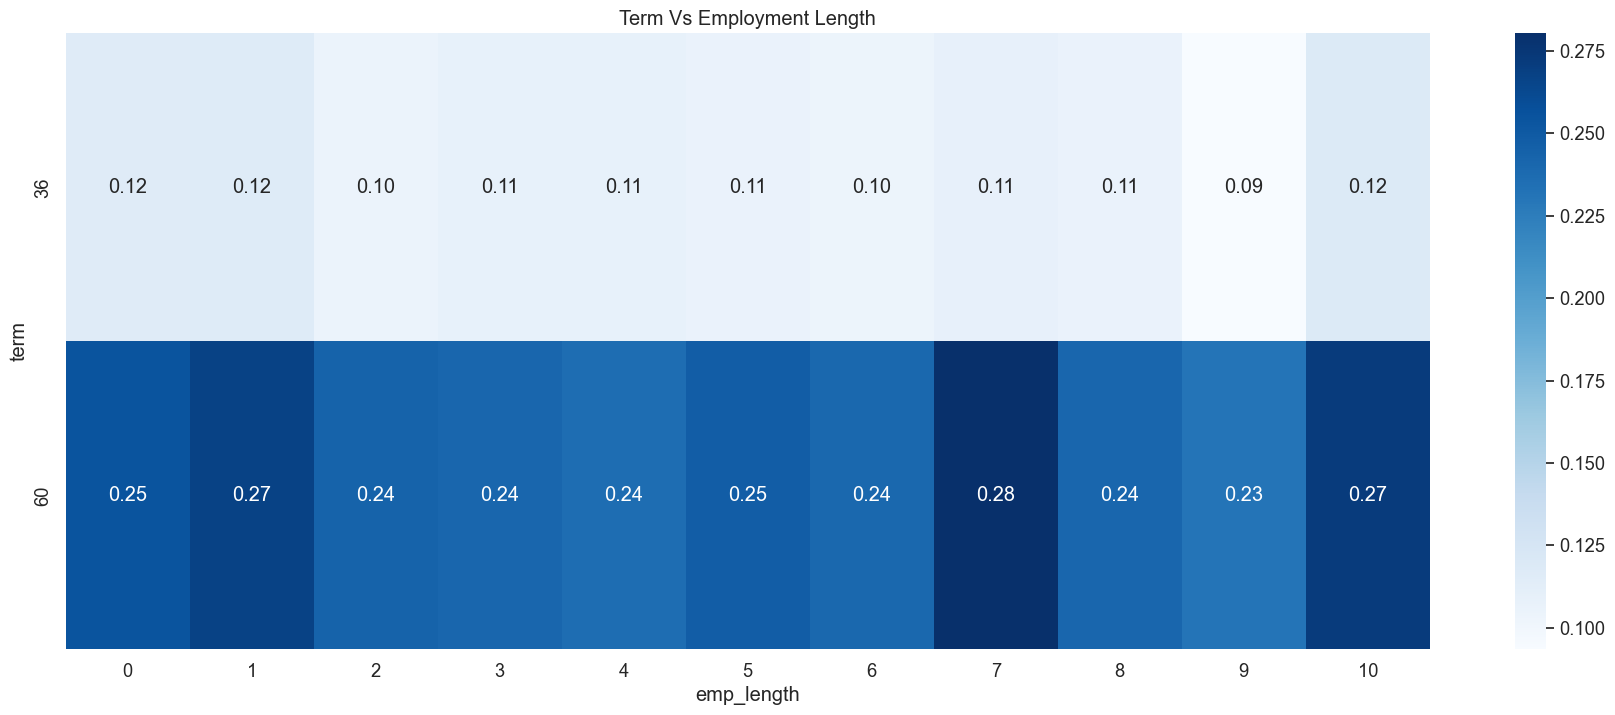

In [694]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='term', columns='emp_length')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Term Vs Employment Length')
plt.show()

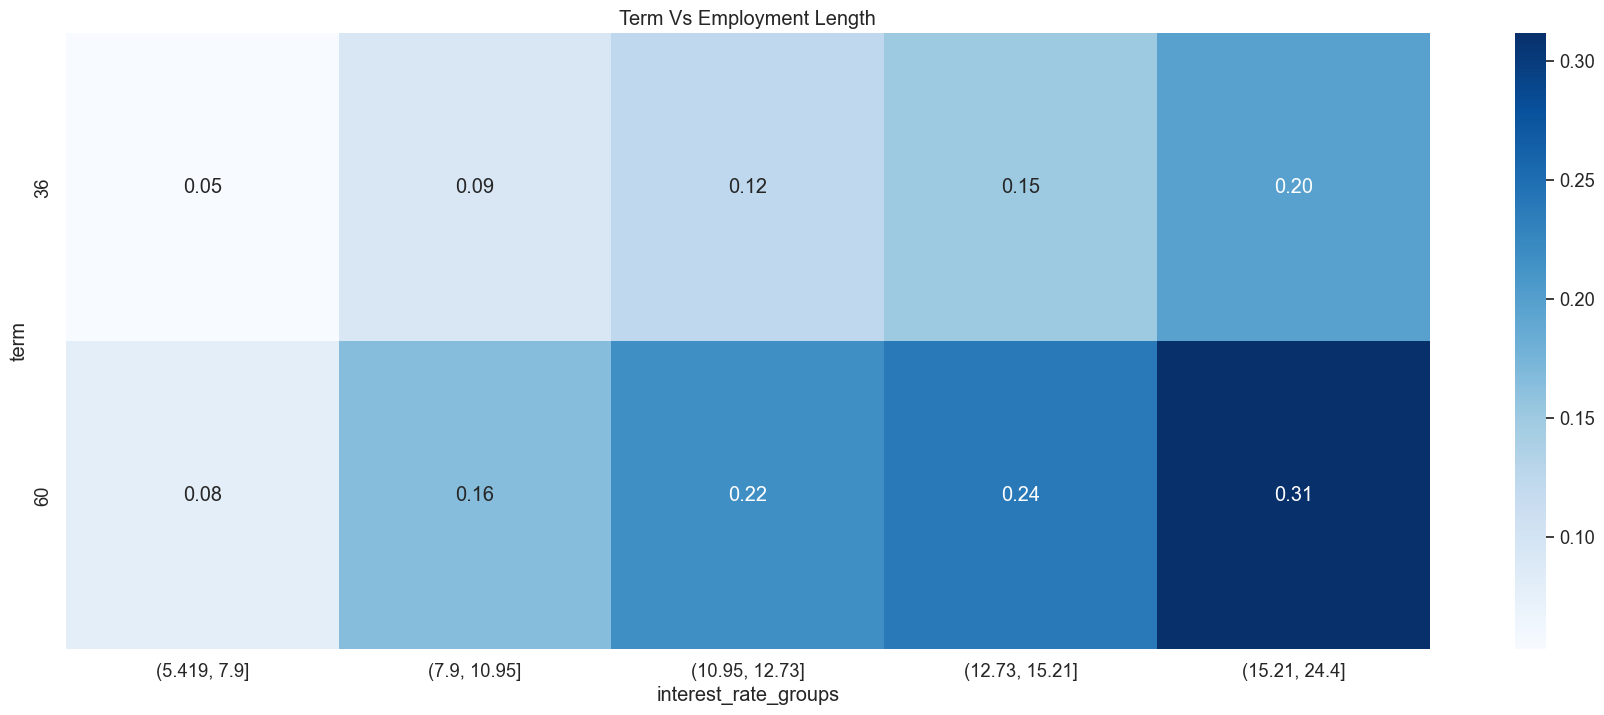

In [696]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='term', columns='interest_rate_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Term Vs Employment Length')
plt.show()

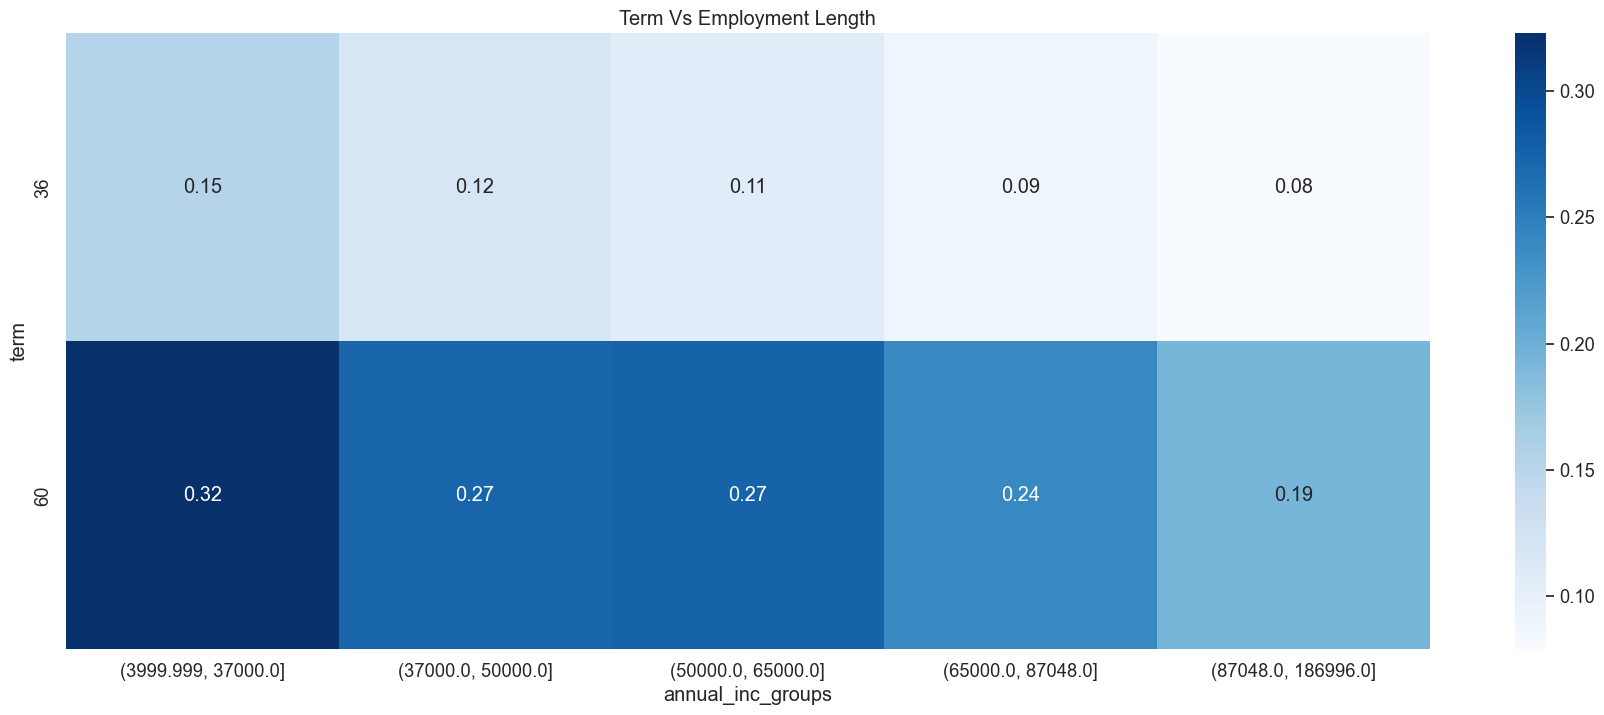

In [697]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='term', columns='annual_inc_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Term Vs Employment Length')
plt.show()

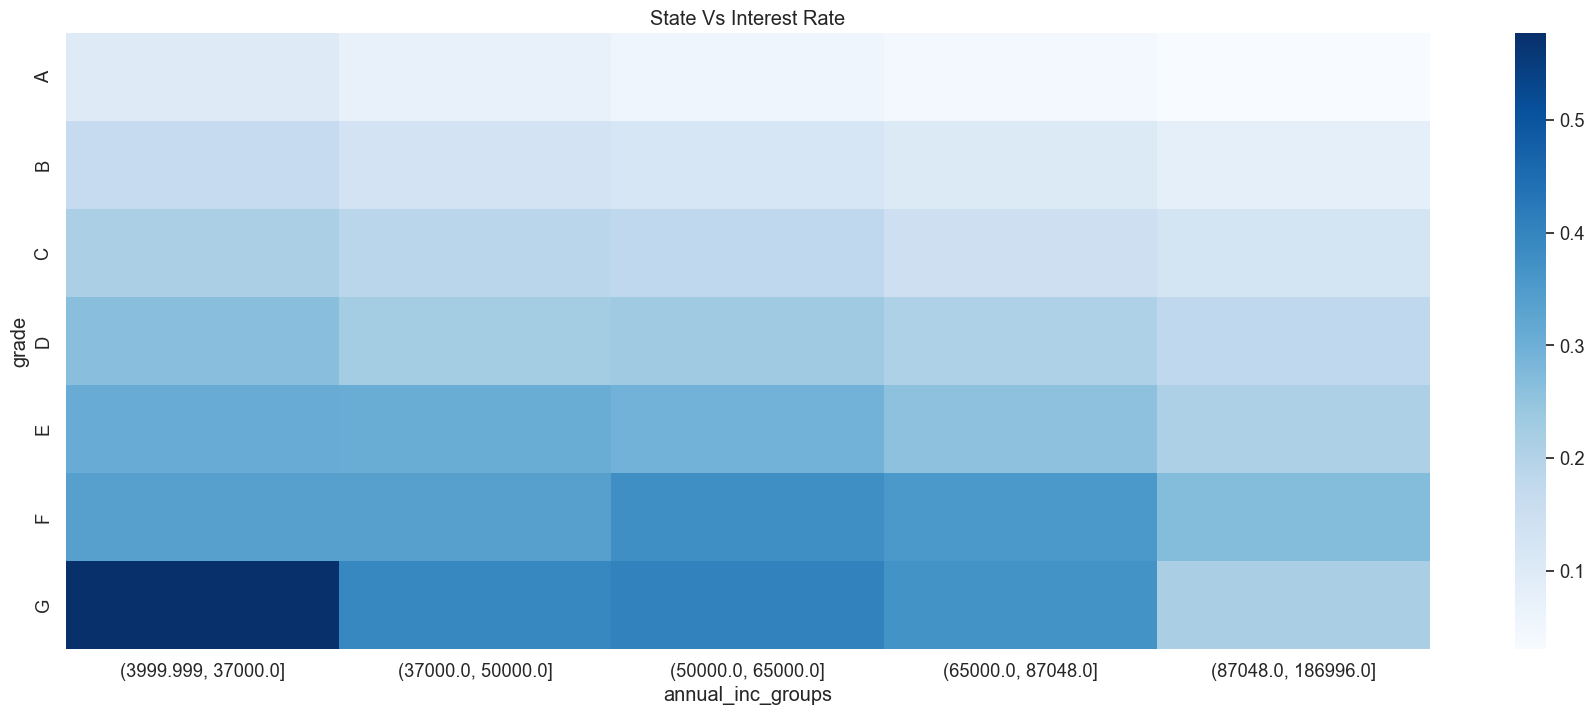

In [701]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='grade', columns='annual_inc_groups')

sns.heatmap(pivot_table, annot=False, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Grade Vs Annual Income')
plt.show()

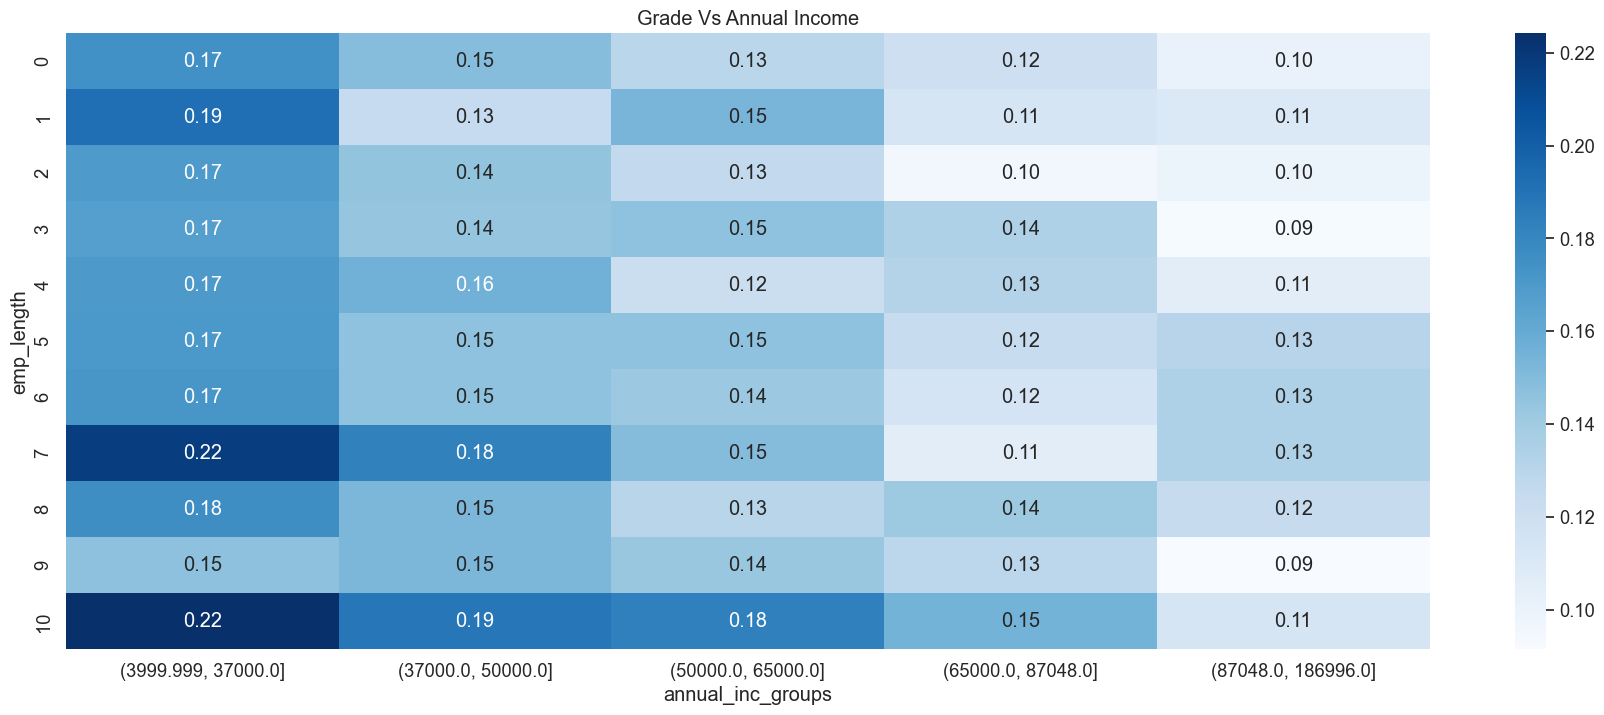

In [704]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='emp_length', columns='annual_inc_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Employment Length Vs Annual Income')
plt.show()

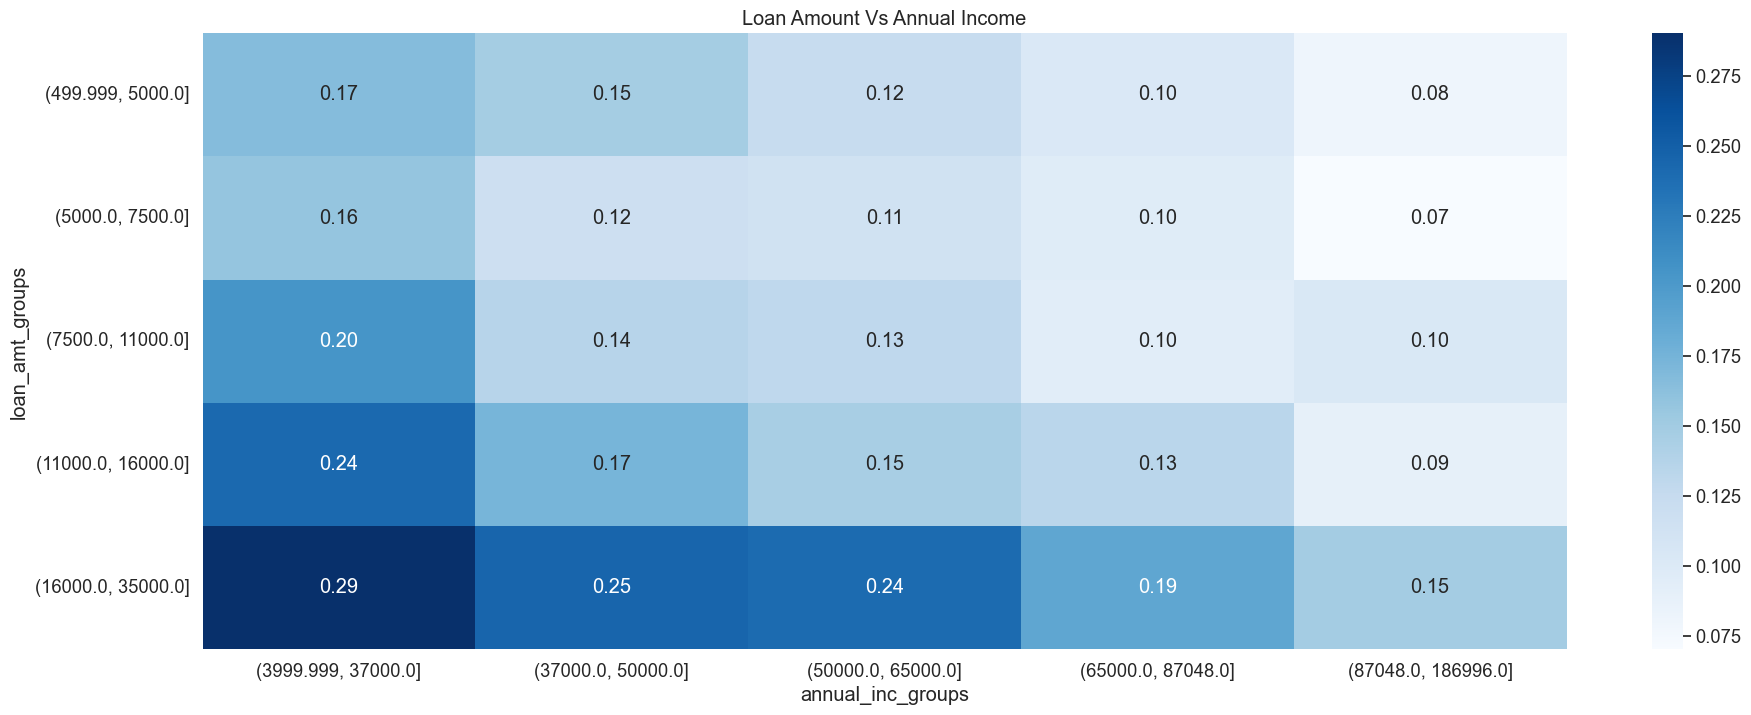

In [705]:
fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='loan_amt_groups', columns='annual_inc_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Loan Amount Vs Annual Income')
plt.show()